# **LAB 01: Trực quan hóa dữ liệu với Python**
---

## Lớp: Trực quan hoá dữ liệu 20_21

### **Thông tin nhóm:**

| Index   |     Họ và Tên     |  MSSV |
|---------|:--------------|:---------|
| 1       | Nguyễn Đức Minh Quân         |20120357|
| 2       | Trương Văn Hào          |20120471|
| 3       | Lê Trương Kinh Thành            | 20120373        |
| 4       | Võ Minh Hiếu            | 20120480        |
| 5 | Lưu Qúy Tùng | 20120616|

20120357_20120373_20120471_20120480_20120616_Lab01

---

<p style="font-size:45px; color:#90c251;font-weight:bold; font-family:Barlow;">
A. Thu thập dữ liệu <br>

### Ngữ cảnh chọn chủ đề

Nhóm gồm 5 thành viên, khi cùng bàn luận để chọn chủ đề, các thành viên đều hứng thú với lĩnh vực bóng đá. Nhóm tiến hành tím kiếm các tập dữ liệu liên quan đến các giải bóng lớn và quyết định chọn giải Ngoại Hạng Anh (Premier League)

### Nguồn dữ liệu

Dữ liệu được lấy từ dataset của **`TANMAY NEMA`** trên Kaggle. Đường dẫn: https://www.kaggle.com/datasets/tanmaynema/premier-league-match-data-2019-2023?resource=download

Bộ dữ liệu này được người chia sẻ tổng hợp được trên trang ***"https://fbref.com/"***

Trang web trên là dữ liệu công khai, nhóm thực hiện phân tích trên mục đích học tập nên hoàn toàn không vi phạm gì về vấn đề bản quyền.

### Import thư viện

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

### Đọc file csv

In [7]:
df = pd.read_csv("../datasets/matches.csv", index_col=0) 
df.head()

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
1,2022-08-07,16:30,Premier League,Matchweek 1,Sun,Away,W,2.0,0.0,West Ham,...,Match Report,NaN,13.0,1.0,18.7,1.0,1.0,1.0,2023,Manchester City
2,2022-08-13,15:00,Premier League,Matchweek 2,Sat,Home,W,4.0,0.0,Bournemouth,...,Match Report,NaN,19.0,7.0,17.5,0.0,0.0,0.0,2023,Manchester City
3,2022-08-21,16:30,Premier League,Matchweek 3,Sun,Away,D,3.0,3.0,Newcastle Utd,...,Match Report,NaN,21.0,10.0,16.2,1.0,0.0,0.0,2023,Manchester City
4,2022-08-27,15:00,Premier League,Matchweek 4,Sat,Home,W,4.0,2.0,Crystal Palace,...,Match Report,NaN,18.0,5.0,14.1,0.0,0.0,0.0,2023,Manchester City
5,2022-08-31,19:30,Premier League,Matchweek 5,Wed,Home,W,6.0,0.0,Nott'ham Forest,...,Match Report,NaN,17.0,9.0,14.8,0.0,0.0,0.0,2023,Manchester City


<p style="font-size:45px; color:#90c251;font-weight:bold; font-family:Barlow;">
B. Khám phá dữ liệu <br>

### **Dữ liệu có bao nhiêu dòng và cột?**

In [8]:
num_rows,num_cols=df.shape
print('Số cột : {}'.format(num_cols))
print('Số dòng: {}'.format(num_rows))

Số cột : 27
Số dòng: 2721


### **Mỗi dòng có ý nghĩa gì?**

Các dòng có ý nghĩa giống nhau là những thông số được ghi lại của một trận đấu thuộc khuôn khổ giải đấu Ngoại Hạng Anh (Premier League) từ năm 2020 - 2023.

### **Các dòng có bị lặp hay không?**

In [9]:
have_duplicated_rows = df.duplicated().any()

if have_duplicated_rows:
    print('Các dòng dữ liệu bị lặp')
else:
    print('Các dòng dữ liệu không bị lặp')

Các dòng dữ liệu không bị lặp


### **Mỗi cột có ý nghĩa gì**

Các cột

In [10]:
df.columns

Index(['date', 'time', 'comp', 'round', 'day', 'venue', 'result', 'gf', 'ga',
       'opponent', 'xg', 'xga', 'poss', 'attendance', 'captain', 'formation',
       'referee', 'match report', 'notes', 'sh', 'sot', 'dist', 'fk', 'pk',
       'pkatt', 'season', 'team'],
      dtype='object')

1. **date:**  Ngày tháng năm diễn ra trận đấu
2. **time:**  Thời gian diễn ra trận đấu
3. **comp:**  Giải đấu
4. **round:**  Vòng đấu
5. **day:**  Thứ ngày diễn ra trận đấu
6. **venue:**  Đội nhà (Home), Đội khách (Away)
7. **result:**  Kết quả: W(Thắng), D(Hoà), L(Thua) 
8. **gf:**  Goals For - Bàn thắng ghi được
9. **ga:**  Goals Against - Bàn thua nhận được
10. **opponent:**  Tên đội bóng đối đầu
11. **xg:**  Expected Goals - Dự đoán bàn thắng ghi được
12. **xga:**  Expected Goals Against - Số bàn thua dự đoán
13. **poss:**  Kiểm soát bóng
14. **attendance:**  Số khán giả cổ vũ
15. **captain:**  Tên đội trưởng
16. **formation:**  Đội hình ra sân
17. **referee:**  Trọng tài chính
18. **match report:**  Báo cáo trận đấu
19. **notes:**  Ghi chú về trận đấu
20. **sh:**  Số lượt sút
21. **sot:**  Số lượt sút trúng đích
22. **dist:** Trung bình khoảng cách của các cú sút
23. **fk:**  Số lần sút phạt cố định
24. **pk:**  Số bàn phạt đền
25. **pkatt:**  Số lần sút phạt đền
26. **season:**  Mùa giải
27. **team:**  Đội bóng thống kê

### **Mỗi cột có kiểu dữ liệu gì?**

In [11]:
df.dtypes

date             object
time             object
comp             object
round            object
day              object
venue            object
result           object
gf              float64
ga              float64
opponent         object
xg              float64
xga             float64
poss            float64
attendance      float64
captain          object
formation        object
referee          object
match report     object
notes           float64
sh              float64
sot             float64
dist            float64
fk              float64
pk              float64
pkatt           float64
season            int64
team             object
dtype: object

Ta nhận thấy cột dữ liệu ngày tháng cần được chuyển sang dạng datetime

In [12]:
df["date"] = pd.to_datetime(df["date"])
df.dtypes

date            datetime64[ns]
time                    object
comp                    object
round                   object
day                     object
venue                   object
result                  object
gf                     float64
ga                     float64
opponent                object
xg                     float64
xga                    float64
poss                   float64
attendance             float64
captain                 object
formation               object
referee                 object
match report            object
notes                  float64
sh                     float64
sot                    float64
dist                   float64
fk                     float64
pk                     float64
pkatt                  float64
season                   int64
team                    object
dtype: object

### **Có cột nào không cần thiết phải xoá không?**

Tìm những cột có 1 giá trị duy nhất

In [13]:
df.nunique()

date            440
time             19
comp              1
round            38
day               7
venue             2
result            3
gf               10
ga               10
opponent         25
xg               48
xga              48
poss             63
attendance      859
captain         140
formation        21
referee          28
match report      1
notes             0
sh               32
sot              16
dist            183
fk                5
pk                4
pkatt             4
season            4
team             25
dtype: int64

Ta thấy có 3 cột "comp", "match report", "notes" có 0 và 1 giá trị duy nhất không cần thiết nên ta xóa đi

In [14]:
df = df.drop(['comp','match report','notes'], axis=1)
df

,date,time,round,day,venue,result,gf,ga,opponent,xg,...,formation,referee,sh,sot,dist,fk,pk,pkatt,season,team
1,2022-08-07,16:30,Matchweek 1,Sun,Away,W,2.0,0.0,West Ham,2.2,...,4-3-3,Michael Oliver,13.0,1.0,18.7,1.0,1.0,1.0,2023,Manchester City
2,2022-08-13,15:00,Matchweek 2,Sat,Home,W,4.0,0.0,Bournemouth,1.7,...,4-2-3-1,David Coote,19.0,7.0,17.5,0.0,0.0,0.0,2023,Manchester City
3,2022-08-21,16:30,Matchweek 3,Sun,Away,D,3.0,3.0,Newcastle Utd,2.1,...,4-3-3,Jarred Gillett,21.0,10.0,16.2,1.0,0.0,0.0,2023,Manchester City
4,2022-08-27,15:00,Matchweek 4,Sat,Home,W,4.0,2.0,Crystal Palace,2.2,...,4-2-3-1,Darren England,18.0,5.0,14.1,0.0,0.0,0.0,2023,Manchester City
5,2022-08-31,19:30,Matchweek 5,Wed,Home,W,6.0,0.0,Nott'ham Forest,3.3,...,4-2-3-1,Paul Tierney,17.0,9.0,14.8,0.0,0.0,0.0,2023,Manchester City
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,2020-07-07,18:00,Matchweek 34,Tue,Away,L,1.0,2.0,Watford,1.2,...,4-2-3-1,Anthony Taylor,12.0,3.0,16.9,1.0,0.0,0.0,2020,Norwich City
39,2020-07-11,12:30,Matchweek 35,Sat,Home,L,0.0,4.0,West Ham,0.6,...,4-2-3-1,Kevin Friend,11.0,2.0,19.8,1.0,0.0,0.0,2020,Norwich City
40,2020-07-14,20:15,Matchweek 36,Tue,Away,L,0.0,1.0,Chelsea,0.1,...,4-1-4-1,Jonathan Moss,2.0,0.0,20.6,0.0,0.0,0.0,2020,Norwich City
41,2020-07-18,17:30,Matchweek 37,Sat,Home,L,0.0,2.0,Burnley,0.3,...,4-2-3-1,Kevin Friend,6.0,2.0,13.4,0.0,0.0,0.0,2020,Norwich City


### **Với mỗi cột có kiểu dữ liệu dạng numeric, các giá trị được phân bố như thế nào?**

Với mỗi cột numeric, tính tỉ lệ % giá trị thiếu (từ 0 đến 100), min, max. Lưu kết quả vào dataframe `nume_col_profiles_df`. Dataframe này có 3 dòng là "missing_ratio", "min", "max".

In [15]:
nume_col_profiles_df = df.select_dtypes('number')
missing_ratio = nume_col_profiles_df.isnull().sum() * 100 / len(df)
min_value = nume_col_profiles_df.min()
max_value = nume_col_profiles_df.max()
nume_col_profiles_df = pd.DataFrame(data = [missing_ratio, min_value, max_value], 
                                    index = ['missing_ratio', 'min', 'max'])

nume_col_profiles_df.round(2)

,gf,ga,xg,xga,poss,attendance,sh,sot,dist,fk,pk,pkatt,season
missing_ratio,0.0,0.0,0.0,0.0,0.0,32.34,0.0,0.0,0.04,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,18.0,2000.00,0.0,0.0,5.30,0.0,0.0,0.0,2020.0
max,9.0,9.0,5.9,5.9,82.0,75546.00,31.0,15.0,35.00,4.0,3.0,3.0,2023.0


Với mỗi cột categorical, tính tỉ lệ % giá trị thiếu (từ 0 đến 100), số lượng giá trị khác nhau (không xét giá trị thiếu), list/array các giá trị khác nhau (không xét giá trị thiếu). Lưu kết quả vào dataframe `cate_col_profiles_df`. Dataframe này có 3 dòng là "missing_ratio", "num_diff_vals", "diff_vals"

In [16]:
nume_col = df.select_dtypes('number').columns.to_list()
cate_col_profiles_df = df.drop(nume_col, axis=1)
missing_ratio = cate_col_profiles_df.isnull().sum() * 100 / len(df)
num_diff = cate_col_profiles_df.nunique()
list_unique = num_diff.copy()

for col in cate_col_profiles_df.columns:
    list_unique[col] = cate_col_profiles_df[col].dropna().unique()

cate_col_profiles_df = pd.DataFrame(data = [missing_ratio, num_diff, list_unique], 
                                  index = ['missing_ratio', 'num_diff_vals', 'diff_vals'])
cate_col_profiles_df

,date,time,round,day,venue,result,opponent,captain,formation,referee,team
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
num_diff_vals,440,19,38,7,2,3,25,140,21,28,25
diff_vals,"[2022-08-07T00:00:00.000000000, 2022-08-13T00:...","[16:30, 15:00, 19:30, 17:30, 12:30, 14:00, 20:...","[Matchweek 1, Matchweek 2, Matchweek 3, Matchw...","[Sun, Sat, Wed, Thu, Fri, Mon, Tue]","[Away, Home]","[W, D, L]","[West Ham, Bournemouth, Newcastle Utd, Crystal...","[İlkay Gündoğan, Kevin De Bruyne, Kyle Walker,...","[4-3-3, 4-2-3-1, 3-4-3, 3-2-4-1, 4-4-2, 4-1-4-...","[Michael Oliver, David Coote, Jarred Gillett, ...","[Manchester City, Arsenal, Manchester United, ..."


### **Dữ liệu có cần xử lý gì khác trước khi phân tích hay không?**

Có một cột Category nhưng mà cần được sắp xếp theo thứ tự để tiện cho việc phân tích, đó là cột `round`, ta chỉ lấy chỉ số của vòng đấu và không lấy cụm từ `Matchweek`

In [17]:
df['round'] = df['round'].str.extract('(\d+)', expand=False).astype(int)
df

,date,time,round,day,venue,result,gf,ga,opponent,xg,...,formation,referee,sh,sot,dist,fk,pk,pkatt,season,team
1,2022-08-07,16:30,1,Sun,Away,W,2.0,0.0,West Ham,2.2,...,4-3-3,Michael Oliver,13.0,1.0,18.7,1.0,1.0,1.0,2023,Manchester City
2,2022-08-13,15:00,2,Sat,Home,W,4.0,0.0,Bournemouth,1.7,...,4-2-3-1,David Coote,19.0,7.0,17.5,0.0,0.0,0.0,2023,Manchester City
3,2022-08-21,16:30,3,Sun,Away,D,3.0,3.0,Newcastle Utd,2.1,...,4-3-3,Jarred Gillett,21.0,10.0,16.2,1.0,0.0,0.0,2023,Manchester City
4,2022-08-27,15:00,4,Sat,Home,W,4.0,2.0,Crystal Palace,2.2,...,4-2-3-1,Darren England,18.0,5.0,14.1,0.0,0.0,0.0,2023,Manchester City
5,2022-08-31,19:30,5,Wed,Home,W,6.0,0.0,Nott'ham Forest,3.3,...,4-2-3-1,Paul Tierney,17.0,9.0,14.8,0.0,0.0,0.0,2023,Manchester City
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,2020-07-07,18:00,34,Tue,Away,L,1.0,2.0,Watford,1.2,...,4-2-3-1,Anthony Taylor,12.0,3.0,16.9,1.0,0.0,0.0,2020,Norwich City
39,2020-07-11,12:30,35,Sat,Home,L,0.0,4.0,West Ham,0.6,...,4-2-3-1,Kevin Friend,11.0,2.0,19.8,1.0,0.0,0.0,2020,Norwich City
40,2020-07-14,20:15,36,Tue,Away,L,0.0,1.0,Chelsea,0.1,...,4-1-4-1,Jonathan Moss,2.0,0.0,20.6,0.0,0.0,0.0,2020,Norwich City
41,2020-07-18,17:30,37,Sat,Home,L,0.0,2.0,Burnley,0.3,...,4-2-3-1,Kevin Friend,6.0,2.0,13.4,0.0,0.0,0.0,2020,Norwich City


<p style="font-size:45px; color:#90c251; font-weight:bold; font-family:Barlow;">
C. Khám phá mối quan hệ trong dữ liệu <br>

<p style="font-size:34px; color:#1f7cca; font-weight:bold; font-family:Barlow;">
Đặt vấn đề 1: Ta chưa bàn đến việc suy nghĩ về tập dữ liệu, ta hãy dùng số liệu để xem sự tương quan giữa chúng để xét đến những suy nghĩ của ta xem có đúng không. <br>

## **1. Biểu đồ Heatmap biểu diễn hệ số tương quan giữa các thông số**
### Các trường dữ liệu tương tác
- gf, ga, xg, xga, poss, attendance, sh, sot, dist, fk, pk, pkatt

### Mục tiêu khi chọn biểu đồ heatmap để trực quan 
- So sánh hệ số tương quan giữa 2 thuộc tính để trực quan hóa và cho biết mức độ liên quan giữa các biến số.
- Đưa ra những quyết định liên quan đến phân tích số liệu.
- Hữu ích trong việc giải thích các mô hình dự đoán, thực hiện kiểm định giả thuyết, và đưa ra các quyết định.

In [18]:
def heatmap_first(df):
    df_plot = df.drop(['round','season'],axis=1)
    plt.figure(figsize=(12, 12))
    mask = np.zeros_like(df_plot.corr())
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(df_plot.corr(numeric_only=True), cmap='coolwarm', annot=True, mask=mask)
    plt.title("So sánh hệ số tương quan giữa các thông số", fontsize= 25)
    plt.show()

C:\Users\MinhQuan\AppData\Local\Temp\ipykernel_26820\1554256183.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.zeros_like(df_plot.corr())


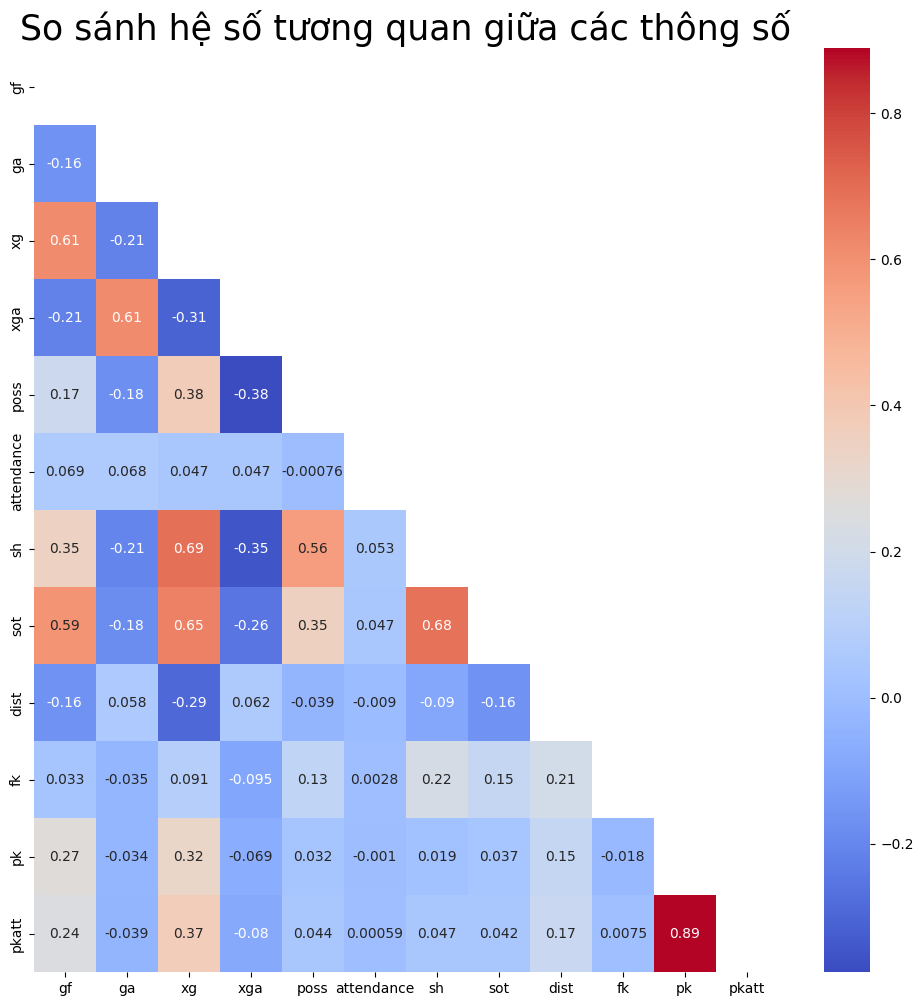

In [19]:
heatmap_first(df)

# Phân tích kết quả của biểu đồ 
- Giá trị của mỗi hệ số tương quan sẽ nằm trong [-1, 1]. Trong đó khi giá trị càng gần về -1 hoặc 1 thì mối quan hệ giữa các biến số càng mạnh. Giá trị gần 0 thì cho thấy sự độc lập giữa các biến số.
- Ví dụ khi giá trị gần về 1 sẽ cho thấy sự tích cực mạnh giữa 2 thuộc tính ( giá trị của thuộc tính này tăng thì thuộc tính kia cũng tăng ), khi gần về -1 sẽ tiêu cực mạnh ( giá trị thuộc tính này tăng thì giá trị thuộc tính kia giảm ).
- Thuộc tính pk và pkatt có mối quan hệ mạnh nhất.
- Mối quan hệ giữa thuộc tính attendance với bất kì các thuộc tính khác đều cho thấy sự độc lập cao.

## **2. Biểu đồ Heatmap so sánh thông số giữa các đội dựa vào chọn giá trị đại diện Mean hoặc Median**

## Các trường dữ liệu tương tác
- gf, ga, xg, xga, poss, attendance, sh, sot, dist, fk, pk, pkatt, team, result
## Xử lý dữ liệu
- Gom nhóm các thông số theo từng đội.
- Sử dụng phương pháp min-max để chuẩn hóa các giá trị của các dữ liệu số.
- Với từng đội, các giá trị của một chỉ số ( trừ result ) được thu thập qua từng trận sẽ tìm mean và median và thông qua hệ số lệch skewness để chọn ra giá trị mean hay median sẽ làm giá trị đại diện cho chỉ số đó.
- Bỏ qua các giá trị trống của dữ liệu khi tính mean hoặc median.
- Riêng thuộc tính result, giữ lại các giá trị 'W'.
## Mục tiêu khi chọn biểu đồ heatmap để trực quan 
- So sánh hệ số tương quan giữa 2 thuộc tính để trực quan hóa và cho biết mức độ liên quan giữa các biến số.
- Đưa ra những quyết định liên quan đến phân tích số liệu.
- Hữu ích trong việc giải thích các mô hình dự đoán, thực hiện kiểm định giả thuyết, và đưa ra các quyết định.

In [20]:
import math

In [21]:
def findSkewnessBasedOnPearson(mean,median, standard_deviation):
    skewness = 3*(mean-median)/standard_deviation
    return skewness

def chooseMeanOrMedian(skewness):
    if math.fabs(skewness) < 0.5:
        return 'mean'
    return 'median'

In [22]:
def preprocessing_data(df):
    list_of_teams = df['team'].unique()
    list_of_attributes = ['gf','ga','xg','xga','poss','attendance','sh','sot','dist','fk','pk','pkatt']
    df = df.loc[:, ['gf','ga','xg','xga','poss','attendance','sh','sot','dist','fk','pk','pkatt', 'team', 'result']]
    df_norm = df[list_of_attributes]
    df_norm = (df_norm - df_norm.min())/(df_norm.max()-df_norm.min())

    df[list_of_attributes] = df_norm

    data = {team: {attribute: -1 for attribute in list_of_attributes} for team in list_of_teams}
    for team in list_of_teams:
        data[team]['result'] = -1
    for attribute in list_of_attributes:
        value_group_by_team = df.groupby('team')[attribute].apply(list)
        mean_s = value_group_by_team.apply(lambda x: np.nanmean(x))
        median_s = value_group_by_team.apply(lambda x: np.nanmedian(x))
        std_s = value_group_by_team.apply(lambda x: np.nanstd(x))
        value = {team: 0 for team in list_of_teams}
        for team in list_of_teams:
            skewness = findSkewnessBasedOnPearson(mean_s[team],median_s[team], std_s[team])
            option = chooseMeanOrMedian(skewness)
            if option == 'mean':
                value[team] = mean_s[team]
            else:
                value[team] = median_s[team]
        if len(set(value.values())) > 2:
            for team in list_of_teams:
                data[team][attribute] = value[team]
        else:
            for team in list_of_teams:
                del data[team][attribute]
    
    #xử lý cột result 
    win_result = {team: 0 for team in list_of_teams}
    value_group_by_team = df.groupby('team')['result'].apply(list)
    for team in list_of_teams:
        win_result[team] = value_group_by_team[team].count('W')
    
    min_win_value = min(win_result.values())
    max_win_value = max(win_result.values())
    for team in list_of_teams:
        data[team]['result'] = (win_result[team] - min_win_value)/(max_win_value-min_win_value)
    return data


In [23]:
def heatmap_second(data):    
    dt = pd.DataFrame.from_dict(data, orient='index')
    df_tall = dt.reset_index().melt(id_vars=['index'], var_name='Index', value_name='Value')
    df_tall = df_tall.rename(columns={'index': 'Team'})

    # Vẽ biểu đồ nhiệt
    plt.figure(figsize=(10, 10))
    plt.title("So sánh thông số giữa các đội dựa vào chọn giá trị đại diện Mean hoặc Median", fontsize=20)
    sns.heatmap(df_tall.pivot(index='Team', columns='Index', values='Value'), annot=True, cmap="coolwarm")
    plt.show()

In [24]:
data = preprocessing_data(df)

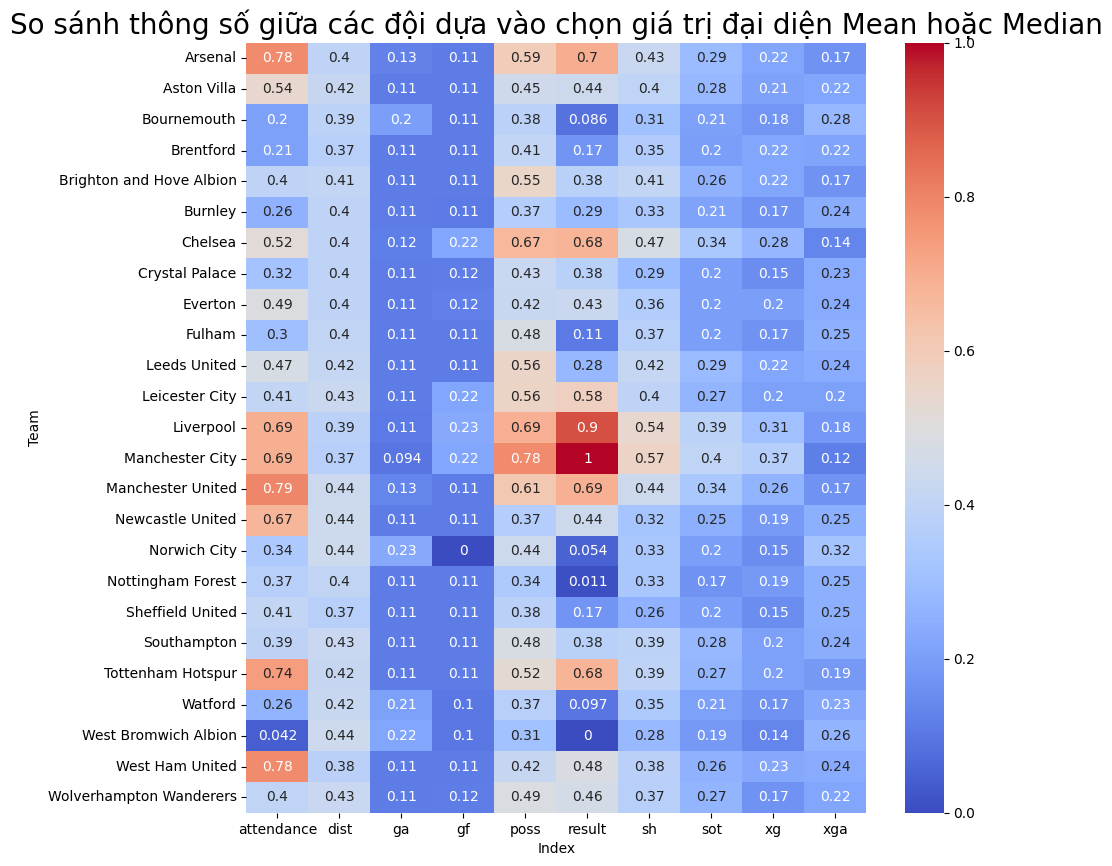

In [25]:
heatmap_second(data)

# Phân tích kết quả của biểu đồ
- Giá trị của mỗi chỉ số của 1 đội sẽ từ 0 đến 1. Trong đó giá trị tiến về 0 thì chỉ số càng thấp, giá trị tiến về 1 chỉ số càng vượt trội so với các đội khác.
- Dựa vào ngữ nghĩa mục tiêu khi vẽ biểu đồ, ta thấy đội Manchester City chiếm nhiều chỉ số trên sân vượt trội nhất với 4 trên 9 chỉ số ( poss, sh, sot, xg ).
- Từ đó ta thấy phần nào hợp lý khi đội Manchester City có số trận thắng nhiều nhất trong các đội. 

## **Giới bóng đá có khái niệm "BIG SIX" để nói về 6 đội mạnh nhất của giải Ngoại hạng Anh, liệu số liệu trên biểu đồ có đúng với sức mạnh của BIG6 hay không?**

Theo truyền thông, 6 đội đó chính là: 
1. Manchester City
2. Liverpool
3. Manchester United
4. Chelsea
5. Arsenal
6. Tottenham Hotspur

Ta thử lấy Top 6 kết quả của cột `result` để xác nhận có đúng hay không?

In [26]:
df_data = pd.DataFrame(index=data, data=data.values())
df_data = df_data.sort_values(['result'],ascending=False)
df_data.iloc[:6]

,gf,ga,xg,xga,poss,attendance,sh,sot,dist,result
Manchester City,0.222222,0.094079,0.367314,0.118644,0.781250,0.693634,0.565105,0.401946,0.373737,1.000000
Liverpool,0.232922,0.106173,0.305085,0.180665,0.689120,0.692906,0.540024,0.387160,0.385584,0.903226
Arsenal,0.111111,0.125926,0.220339,0.169492,0.593750,0.781769,0.425806,0.288395,0.398179,0.698925
Manchester United,0.111111,0.133820,0.262650,0.169492,0.609375,0.793082,0.439840,0.336740,0.436383,0.688172
Tottenham Hotspur,0.111111,0.111111,0.203390,0.186441,0.524065,0.738422,0.394632,0.266667,0.419499,0.677419
Chelsea,0.222222,0.118464,0.275798,0.135593,0.666705,0.516126,0.474620,0.336765,0.395499,0.677419


### **Vậy BIG SIX quả thật rất mạnh**

<p style="font-size:34px; color:#1f7cca; font-weight:bold; font-family:Barlow;">
Đặt vấn đề 2: Thông số của các đội BigSix như thế nào? Vẽ biểu đồ trực quan <br>

## **1. Số trận Thắng/Hoà/Thua (W/D/L)**

### Các trường dữ liệu tương tác
- team
- result
### Xử lý dữ liệu
* Lọc dữ liệu ở trường team lấy những dòng nào có dữ liệu thuộc nhóm big six của ngoại hạng anh ('Manchester City', 'Manchester United', 'Chelsea', 'Arsenal', 'Liverpool', 'Tottenham Hotspur')
* Từ result tính tổng các trận thắng, hòa, thua -> chuyển result với 3 mẫu dữ liệu "W", "D", "L" thành 3 columns cùng với kết quả đã tính trước đó
* Từ kết quả ở 3 columns ta tính phần trăm: giá trị tại column / tổng sô trận tham gia => thay thế giá trị hiện tại bằng giá trị phần trăm mới này


In [27]:
plt.style.use('ggplot')

In [28]:
# xử lý dữ liệu lọc dữ liệu các đội bóng thuộc bigsix, tính tổng số trận thắng thua hòa
team_big_6 = ['Manchester City', 'Manchester United', 'Chelsea', 'Arsenal', 'Liverpool', 'Tottenham Hotspur']
team_result = df[df['team'].isin(team_big_6)]
team_result = team_result[['team', 'result']]
team_result = team_result.groupby(['team', 'result'])['result'].count().reset_index(name="count")
team_result = team_result.pivot(index="team", columns="result", values="count").fillna(0).reset_index().rename_axis(None, axis = 1)
team_result

,team,D,L,W
0,Arsenal,27,38,70
1,Chelsea,34,34,68
2,Liverpool,25,21,89
3,Manchester City,17,22,98
4,Manchester United,37,31,69
5,Tottenham Hotspur,27,42,68


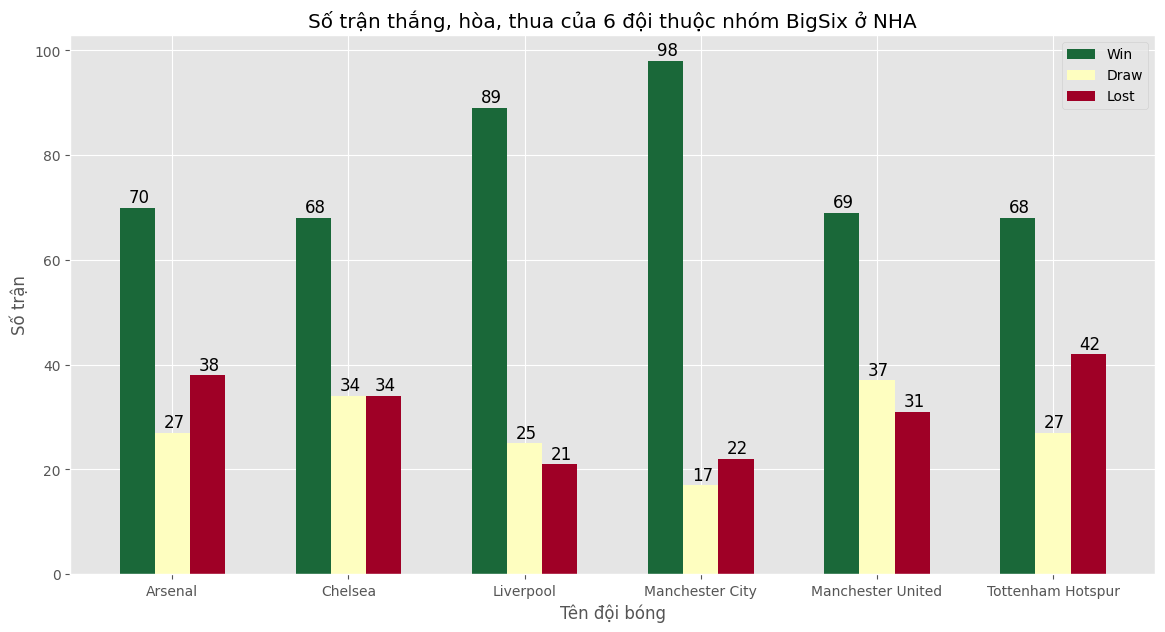

In [29]:
# vẽ biểu đồ
X_axis = np.arange(len(team_result.index))
plt.figure(figsize=(14, 7))  # thiết lập size cho bảng
plt.bar(X_axis - 0.2, team_result['W'], 0.2, label='Win', color="#1a6839")
plt.bar(X_axis, team_result['D'], 0.2, label='Draw', color='#fefec0')
plt.bar(X_axis + 0.2, team_result['L'], 0.2, label='Lost', color='#9f0026')
plt.xticks(X_axis, team_result['team'])
plt.title("Số trận thắng, hòa, thua của 6 đội thuộc nhóm BigSix ở NHA")
plt.xlabel("Tên đội bóng")
plt.ylabel("Số trận")

for index, data in enumerate(team_result["W"]):
    plt.text(x=index - 0.25, y=data + 1,
             s=f"{data}", fontdict=dict(fontsize=12))

for index, data in enumerate(team_result["D"]):
    plt.text(x=index - 0.05, y=data + 1,
             s=f"{data}", fontdict=dict(fontsize=12))

for index, data in enumerate(team_result["L"]):
    plt.text(x=index + 0.15, y=data + 1,
             s=f"{data}", fontdict=dict(fontsize=12))

plt.legend()


### Giải thích biểu đồ
Trục x biểu diện tổng số trận đấu các đội bóng đã chơi (từ năm 2020-2023 (vẫn còn đang cập nhật)), trục y biểu diễn cho tên các đội bóng nằm trong nhóm big six của ngoại hạng anh. Mội đội sẽ được biểu diễn 3 cột dữ liệu để tượng trưng cho số trận thắng, thua, hòa của mỗi đội. Cột màu tím biểu diễn số trận thắng, cột màu xanh lá biểu diễn cho số trận hòa, cột màu xanh dương biểu diễn cho số trận thua. 
### Lý do chọn biểu đồ ***Multiple bar chart***
Biểu đồ nhiều cột giúp ích cho việc so sánh các trường dữ liệu. Dựa vào biểu đồ ta dễ dạng biết được đội bóng có số trận thắng, thua, hòa là bao nhiêu. Đồng thời quan sát được sự chênh lệch về độ cao của các cột dữ liệu, điều này rất hữu ích cho việc so sánh các đội bóng với nhau  trên cùng một trường dữ liệu. Từ đó cho thấy đội bóng nào đã và đang thể hiện bộ mặt tích cực (nhờ số trận thắng) và đội bóng nào đang thể hiện bộ mặt bết bát (nhờ số trận thua).
### Phân tích kết quả từ biểu đồ
* Từ biểu độ ta thấy sự chênh lệch rõ ràng về số trận thằng, thua và hòa của các đội bóng thuộc big six. Cột thằng (màu tím) càng cao thì thể hiện đội bóng càng mạnh trong giai đoạn (2020-2023), cột xanh nước biển càng cao thì thể hiện đội bóng càng yếu trong giai đoạn (2020-2023)
* Qua biểu đồ, ta có thể thấy Manchester City áp đảo với 98 trận thắng và chỉ vỏn vẹn 22 trận thua (gần như thấp nhất chỉ sau Liverpool). Còn Tottenham Hotspur có cột thua cao nhất (không quá chênh lệch nhiều).
* Từ đó, ta thấy trong giai đoạn 2020-2023 ở ngoại hạng anh, Manchester City là đội mạnh nhất có các chỉ số thằng, thua, hòa đều vượt trội so với phần còn lại.

## **2. Liệu ở sân nhà hay sân khách có ảnh hưởng đến năng lực ghi bàn của BigSix hay không?**

<h3> Trường dữ liệu </h3>
<ul>
    <li>venue</li>
    <li>gf</li>
    <li>team</li>
</ul>
<h3> Xử lý dữ liệu </h3>
<ul>
    <li>Lọc ra các cột vue,gf,team từ dữ liệu</li>
    <li>Tiếp thục lọc theo các team thuộc nhóm big6 </li>
    <li>Đếm tổng số bàn sân nhà, sân khách </li>
    <li>Đếm số bàn sân nhà và sân khách từng đội</li>
    <li>Tính phần trăm bàn thắng sân nhà, sân khách </li>
    <li>Tính phần trăm bàn thăng sân nhà/sân khách của mỗi đội </li>
</ul>

<h3> Lý do chọn nested pie chart (biểu đồ tròn lồng nhau) </h3>
<ul>
  <li>Nested pie chart thường được dùng để phân cấp dữ liệu. Trong trường hợp này, số lượng bàn thắng sân nhà và sân khách của từng đội trong Big 6 có thể được xem như là phân cấp của tổng số bàn thắng của từng đội đó. Nested pie chart cho phép ta trực quan hóa được phân cấp này bằng cách đặt biểu đồ tròn bên trong biểu đồ tròn lớn hơn để biểu thị số lượng bàn thắng sân nhà và sân khách của từng đội. </li>
  <li>Dễ dàng nhìn thấy sự phân chia tỉ lệ bàn thắng các đội</li>
  <li>Biểu đồ nested pie chart này giúp người xem có thể dễ dàng so sánh số lượng bàn thắng sân nhà và sân khách của từng đội với tổng số bàn thắng và so sánh số bàn thắng các đội với nhau</li>
</ul>

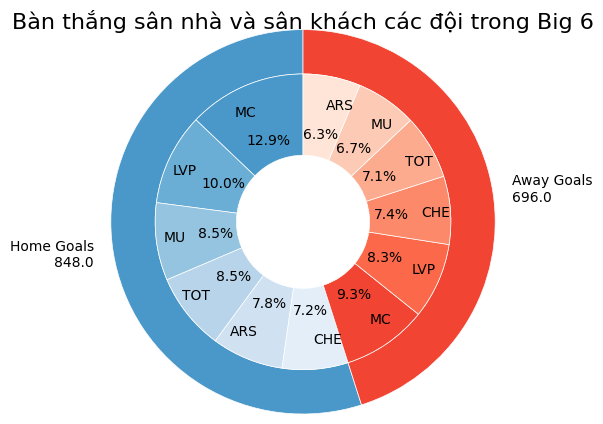

In [30]:
# lấy các cột venue, gf, team
subset_df = df.loc[:, ['venue', 'gf', 'team']]

#Lọc dữ liệu các team trong Big6
teams= ['Manchester City','Manchester United','Arsenal','Tottenham Hotspur','Chelsea','Liverpool'] #Các đội trong Big6
shortTeamNames = {'Manchester City':'MC','Manchester United':'MU','Arsenal':'ARS','Tottenham Hotspur':'TOT','Chelsea':'CHE','Liverpool':'LVP'} #Tên viết tắt các đội
df_filtered = subset_df.loc[subset_df['team'].isin(teams)]



# Đếm số bàn sân nhà sân khách các đội
df_grouped = df_filtered.groupby(['venue', 'team']).sum().reset_index()

# Chia ra sân nhà và sân khách sau đó sort theo số lượng bàn
df_home = df_grouped[df_grouped['venue'] == 'Home'].sort_values(by='gf', ascending=False)
df_away = df_grouped[df_grouped['venue'] == 'Away'].sort_values(by='gf', ascending=False)


# Tính tổng số bàn thắng sân nhà và sân khách
total_home_goals = df_home['gf'].sum()
total_away_goals = df_away['gf'].sum()


# Tạo nested pie chart
fig, ax = plt.subplots()

#Tạo colors
homeColor,awayColor = [plt.cm.Blues, plt.cm.Reds]
# Vẽ pie chart ngoài cùng (tổng số bàn thắng)
outer_labels = ['Home Goals\n{}'.format(total_home_goals),
                'Away Goals\n{}'.format(total_away_goals)]
outer_values = [total_home_goals, total_away_goals]
mypie,_=ax.pie(outer_values, radius=1.3, labels=outer_labels, colors=[homeColor(0.6), awayColor(0.6)],startangle=90)
plt.setp( mypie, width=0.3, edgecolor='white')



# Vẽ pie chart bên trong (số bàn thắng sân nhà và sân khách của từng đội)
inner_values = df_home['gf'].tolist() + df_away['gf'].tolist()
inner_labels = df_home['team'].tolist() + df_away['team'].tolist()
inner_labels = list(map(lambda x: shortTeamNames[x] if x in shortTeamNames else x, inner_labels)) #Đổi tên các đội thành tên viết tắt

mypie2 = ax.pie(inner_values, radius=1.3-0.3,  labeldistance=0.8, autopct='%1.1f%%',
labels=inner_labels,  colors=[homeColor(0.6),homeColor(0.5),homeColor(0.4),homeColor(0.3),homeColor(0.2),homeColor(0.1),awayColor(0.6),awayColor(0.5),awayColor(0.4),awayColor(0.3),awayColor(0.2),awayColor(0.1)],startangle=90)
plt.setp( mypie2[0], width=0.55, edgecolor='white')

# Thêm tiêu đề
ax.set_title('Bàn thắng sân nhà và sân khách các đội trong Big 6', fontsize=16)

# Hiển thị biểu đồ
plt.show()

<h3> Phân tích, khám phá </h3>

 - Biểu đồ này là một nested pie chart thể hiện số lượng bàn thắng được ghi được của các đội bóng trong Big 6 của Ngoại hạng Anh trên sân nhà và sân khách. Pie chart ngoài cùng thể hiện tổng số bàn thắng của cả sân nhà và sân khách của tất cả các đội. Pie chart bên trong thể hiện phân bố bàn thắng giữa sân nhà và sân khách của từng đội bóng. 
 - Từ biểu đồ ta có thể thấy tổng số bàn thắng trên sân nhà là cao hơn so với sân khách, điều này chứng tỏ sân nhà mang lại lợi thế lớn hơn nhiều cho các đội bóng. 
 - Manchester City là đội có số bàn thằng cao nhất ở cả sân nhà và sân khách, Liverpool cũng thứ 2 về thành tích ghi bản cả sân nhà và sân khách cho thấy 2 đội này có hàng công mạnh ghi bàn ổn định ở cả sân nhà và sân khách. Manchester United và Tottenham là đội có tổng số bàn thằng nằm giữa và số bàn sân khách ít hơn so với sân nhà. Chelsea là trường hợp đặc biệt khi số bàn thằng sân khách của họ lại nhiều hơn sân nhà. Arsenal có số bàn thắng khá thấp ở cả sân nhà và sân khách so với các đội khác chứng tỏ họ đang gặp vấn đề về đầu ra bàn thằng trong những năm gần đây.

<p style="font-size:34px; color:#1f7cca; font-weight:bold; font-family:Barlow;">
Đặt vấn đề 3: Ta hãy cùng suy nghĩ về những yếu tố có thể ảnh hưởng đến trận đấu <br>

## **1. Lối chơi và chiến thuật**

### **1.1. Thống kê sơ đồ chiến thuật ra sân được sử dụng trong giải đấu**

<h3> Trường dữ liệu </h3>
<ul>
    <li>formation</li>
</ul>
<h3> Xử lý dữ liệu </h3>
<ul>
    <li>Tính phần trăm của mỗi giá trị formation so với tổng số trận đấu</li>
</ul>




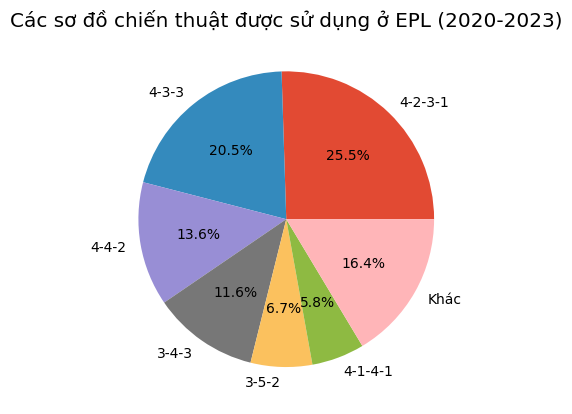

In [31]:
# Đếm số lượng dòng tương ứng với số trận
total = df.shape[0]

# Đếm số lượng mẫu cho từng giá trị của cột "formation"
counts = df["formation"].value_counts()

# Gom các phần có số lần xuất hiện bé hơn 3%
others = counts[counts/total <0.03].sum()
counts = counts[counts/total >=0.03]
counts['Khác'] = others


# Vẽ pie chart
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')

# Thêm tiêu đề cho biểu đồ
plt.title("Các sơ đồ chiến thuật được sử dụng ở EPL (2020-2023)")

# Hiển thị biểu đồ
plt.show()


<h3> Phân tích, khám phá </h3>

 - Biểu đồ thể hiện tỉ lệ phần trăm các sơ đồ chiến thuật được sử dụng ở giải bóng đá Ngoại hạng Anh từ năm 2020 - 2023. Qua biểu đồ ta thấy được sơ đồ 4-2-3-1 được sử dụng nhiều nhất với 25.5%, ngay sau đó 4-4-3 (20.5%), 4-4-2 (13.6%) và 3-4-3 (11.6%). 4 sơ đồ này chiếm tổng cộng đến hơn 70% điều này cho thấy rằng đây là 4 đội hình phổ biến nhất hiện tại và được đa số các đội ở Ngoại hạng Anh sử dụng. Các sơ đồ chiến thuật còn lại được sử dụng khá ít, có thể lý do là độ hiệu quả của các sơ đồ này trong môi trường Ngoại hạng Anh là không cao.
<h3> Lý do chọn biểu đồ tròn </h3>
<ul>
  <li>Biểu đồ tròn là một công cụ hữu ích để thể hiện tỷ lệ phần trăm của một loạt các mục khác nhau trong một trường dữ liệu. </li>
  <li>Cho thấy tỉ lệ phần trăm các sơ đồ chiến thuật sử dụng trong giải đấu</li>
  <li>Giúp cho người đọc có thể dễ dàng so sánh tỷ lệ phần trăm của các sơ đồ khác nhau </li>
  <li>Giúp cho các thông tin trở nên trực quan và dễ hiểu hơn so với việc đọc các con số trong một bảng dữ liệu</li>
</ul>

### **Vậy độ hiệu quả của các sơ đồ chiến thuật như thế nào?**

In [32]:
def swap_columns(df, col1, col2):
    col_list = list(df.columns)
    x, y = col_list.index(col1), col_list.index(col2)
    col_list[y], col_list[x] = col_list[x], col_list[y]
    df = df[col_list]
    return df

### Các trường dữ liệu tương tác
- formation
- result
### Xử lý dữ liệu
* gom nhóm các sơ đồ chiến thuật và result -> đếm các dòng
* lọc ra có sơ đồ chiến thuật mà có số trận áp dụng ít hơn 20 
* Từ kết quả ở 3 columns ta tính phần trăm: giá trị tại column / tổng sô trận tham gia => thay thế giá trị hiện tại bằng giá trị phần trăm mới này
* Chuyển result với 3 mẫu dữ liệu "W", "D", "L" thành 3 columns cùng với kết quả tính phần trăm ở bước đã tính trước đó

In [33]:
# xử lý dữ liệu tính total các formation được áp dụng
formation_result = df[["formation", "result"]]
formation_result = formation_result.groupby(["formation", "result"])['result'].count().reset_index(name="count")
filter_formation_result = formation_result.groupby(['formation'])['count'].sum().reset_index(name='total')

In [34]:
# xử lý dữ liệu lọc ra các formation có số trận áp dụng >= 20, và tính phần trăm tỷ lệ thắng thua
filter_formation_result = filter_formation_result[filter_formation_result['total'] >= 20]
filter_formation_result = filter_formation_result['formation']
formation_result["%"] = 100 * formation_result["count"]/formation_result.groupby("formation")["count"].transform('sum')
formation_result = formation_result.pivot(index="formation", columns="result", values="%").fillna(0).reset_index().rename_axis(None, axis = 1)
formation_result = formation_result[formation_result['formation'].isin(filter_formation_result)]
formation_result = swap_columns(formation_result, 'D', 'L')
formation_result

,formation,L,D,W
3,3-4-1-2,42.028986,26.086957,31.884058
4,3-4-3,33.333333,25.714286,40.952381
7,3-5-2,49.726776,21.857923,28.415301
8,4-1-2-1-2◆,46.153846,26.923077,26.923077
10,4-1-4-1,45.859873,24.840764,29.299363
11,4-2-2-2,38.095238,23.809524,38.095238
12,4-2-3-1,35.878963,21.902017,42.219020
13,4-3-1-2,35.294118,26.470588,38.235294
15,4-3-3,28.366248,21.723519,49.910233
16,4-4-1-1,56.338028,11.267606,32.394366


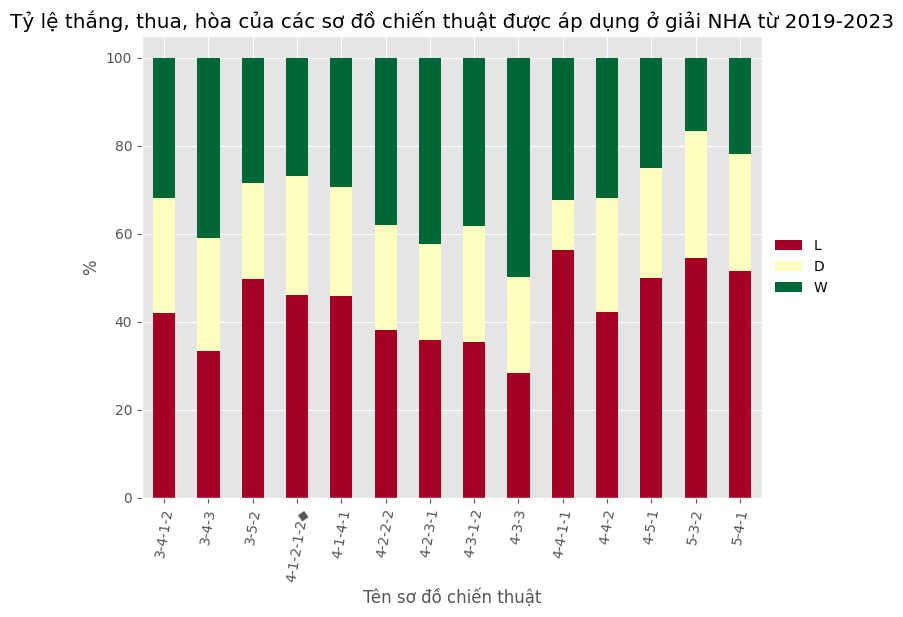

In [35]:
# vẽ biểu đồ
ax = formation_result.plot(kind='bar', stacked=True, figsize=(8, 6), rot=0,colormap='RdYlGn')
default_x_ticks = range(len(formation_result))
plt.xticks(default_x_ticks, formation_result['formation'], rotation=80)
plt.xlabel("Tên sơ đồ chiến thuật")
plt.ylabel("%")
plt.title("Tỷ lệ thắng, thua, hòa của các sơ đồ chiến thuật được áp dụng ở giải NHA từ 2019-2023")
plt.legend(loc = "center left", frameon=False, bbox_to_anchor=(1, 0.5))

### Giải thích biểu đồ
Với mỗi sơ đồ chiến thuật mà các huấn luyện viên áp dụng trên biểu đồ, chiều dài tổng thể trên thang đo 100% và được chia làm 3 phần tương ứng với 3 màu khác nhau để biểu thị cho tỷ lệ thắng, hòa, thua của các sơ đồ chiến thuật. Phần tô màu xanh biểu diễn cho tỷ lệ hòa, màu cam biểu diễn cho tỷ lệ thua và phần màu xanh biểu diễn cho tỷ lệ thắng. 
### Lý do chọn biểu đồ ***Stacked bar chart***
Biểu đồ cột chồng rất hữu ích cho việc so sánh. Dựa vào biểu đồ, ta dễ dàng quan sát để biết tỷ lệ thành phần nào chiếm tỷ lệ cao và thấp. Đồng thời cho thấy rõ tỷ lệ thắng, thua, hòa của các sơ đồ chiến thuật. Điều này giúp ích rất nhiều cho việc so sánh các sơ đồ chiến thuật với nhau. Từ đó cho thấy sơ đồ chiến thuật nào đang mang lại hiệu quả thắng lợi cao khi được áp dụng (không xét đến các yếu tố cầu thủ).
### Phân tích kết quả từ biểu đồ
* Tỷ lệ thằng, thua, hòa được hiển thị rõ rệt. Trong đó sơ đồ chiến thuật nào có màu xanh lá chiếm càng nhiều thì tỷ lệ thắng khi áp dụng sơ đồ chiến thuật đó càng cao (không tính các yếu tố khác tác động vào như cầu thủ, ...). Sơ đồ nào màu đỏ chiếm diện tích càng nhiều thì khi áp dụng sơ đồ chiến thuật thì tỷ lệ thua càng cao.
* Dựa vào sơ đồ ta có thẻ thấy sơ đồ 4-4-1-1 khi áp dụng thì tỷ lệ thua cực kỳ cao và cao nhất trong các sơ đồ trên, còn sơ đồ 4-3-3 khi áp dụng tỷ lệ thằng cao nhất.
* Từ đó, ta thấy sơ đồ chiến thuật 4-3-3 được áp dụng rất nhiều xuyên suốt từ 2020-2023 với 557 lần áp dụng, còn sơ đồ chiến thuật 4-4-1-1 chỉ được áp dụng vỏn vẹn 71 lần

### **1.2. Lối chơi thông qua lượt sút, khoảng cách sút và tỉ lệ kiểm soát bóng**

Lối chơi của các đội tuyển được phản ánh qua tỉ lệ kiểm soát bóng, lượt sút cũng như là đội nhà hay đội khách. Thông thường, với vai trò là đội nhà, các đội bóng sẽ có nhiều ưu thế và tinh thần hơn so với làm đội khách. Liệu đội nhà hay đội khách có ảnh hưởng đến lối chơi của các đội hay không?

### Trường dữ liệu
- Team
- Venue
- Poss
- Sh
- dist

### Xử lý dữ liệu:
- Trích lọc thông số các cột và trực hoá qua biểu đồ Boxplot

### Lý do chọn biểu đồ ***Box Plot***
- Biểu đồ Boxplot thể hiện được rõ sự phân bố số liệu thông qua các giá trị Q1, mean, Q3 của trường dữ liệu. Dễ dàng có thể so sánh và rút ra sự khác biệt khi đối chiếu 2 hoặc nhiều trường dữ liệu với nhau
- Thông qua biểu đồ, còn có thể rút ra giá trị min, max của trường dữ liệu.

In [36]:
df_ctrl = df[['dist', 'team', 'venue','poss','sh']]
df_ctrl

,dist,team,venue,poss,sh
1,18.7,Manchester City,Away,75.0,13.0
2,17.5,Manchester City,Home,67.0,19.0
3,16.2,Manchester City,Away,69.0,21.0
4,14.1,Manchester City,Home,74.0,18.0
5,14.8,Manchester City,Home,74.0,17.0
...,...,...,...,...,...
38,16.9,Norwich City,Away,56.0,12.0
39,19.8,Norwich City,Home,53.0,11.0
40,20.6,Norwich City,Away,33.0,2.0
41,13.4,Norwich City,Home,42.0,6.0


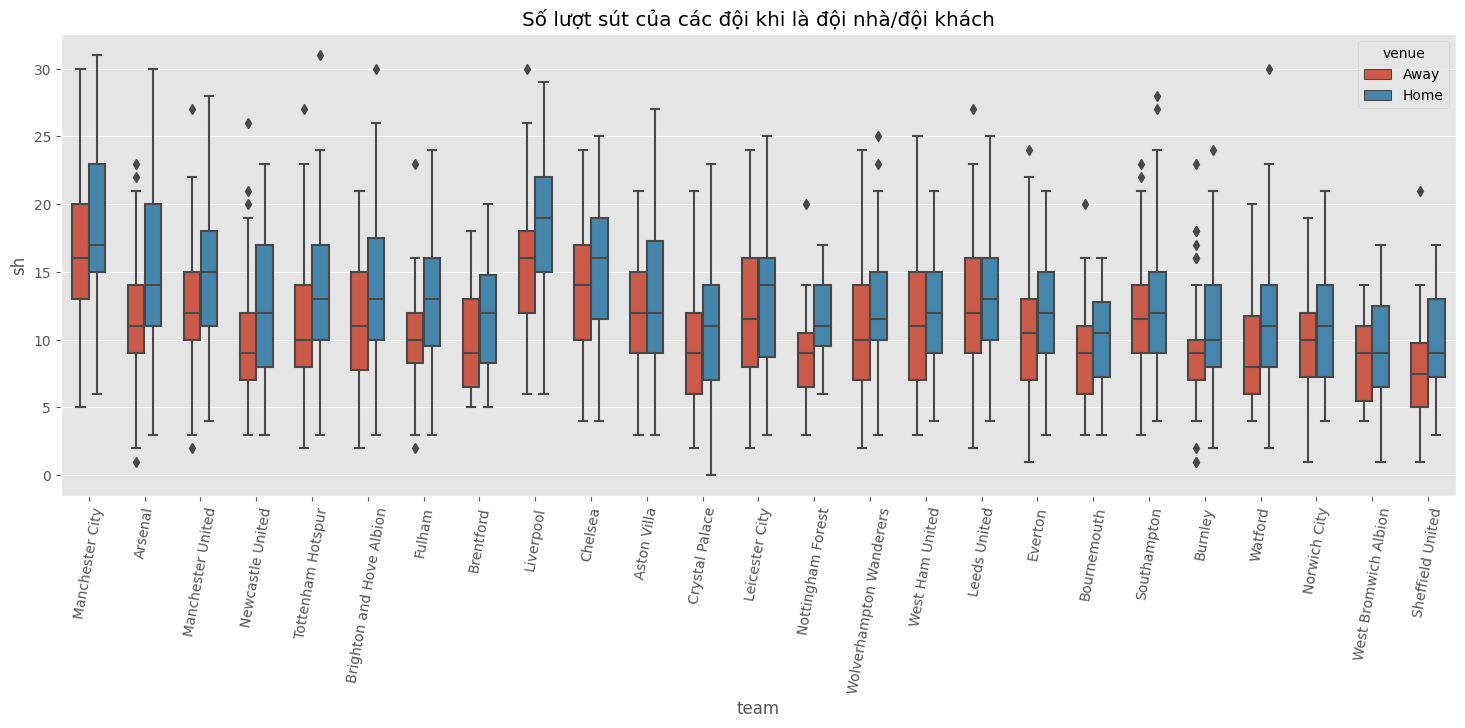

In [37]:
# fig, axs = plt.subplots(ncols=2,figsize=(12,5))
# sns.boxplot(data=df_ctrl, x="venue", y="poss", ax=axs[0])
# sns.boxplot(data=df_ctrl, x="venue", y="sh", ax=axs[1])
# plt.xticks(rotation=80)
plt.subplots(figsize=(18,6))
plt.xticks(rotation=80)
sns.boxplot(data=df_ctrl, x="team", y="sh", hue='venue', width=0.6)
plt.title("Số lượt sút của các đội khi là đội nhà/đội khách")
plt.show()

### Phân tích kết quả từ biểu đồ
* Dễ thấy được với vai trò là đội nhà, số lượt sút từ các đội vượt trội hơn so với đội khách, cho thấy khi là đội nhà, các đội có lối chơi lăn xả, tấn công và dồn sức vào để chiếm được nhiều lời thế nhất.
* Ta có thể thấy được có 2 đội vượt trội hơn hẳn so với các đội khác trong 3 năm trở lại đây, đó chính là ***Manchester City*** và ***Liverpool***. Cũng dễ hiểu với chức vô địch của Liverpool vào năm 2020 và Manchester City liên tiếp 2 năm 2021 và 2022.

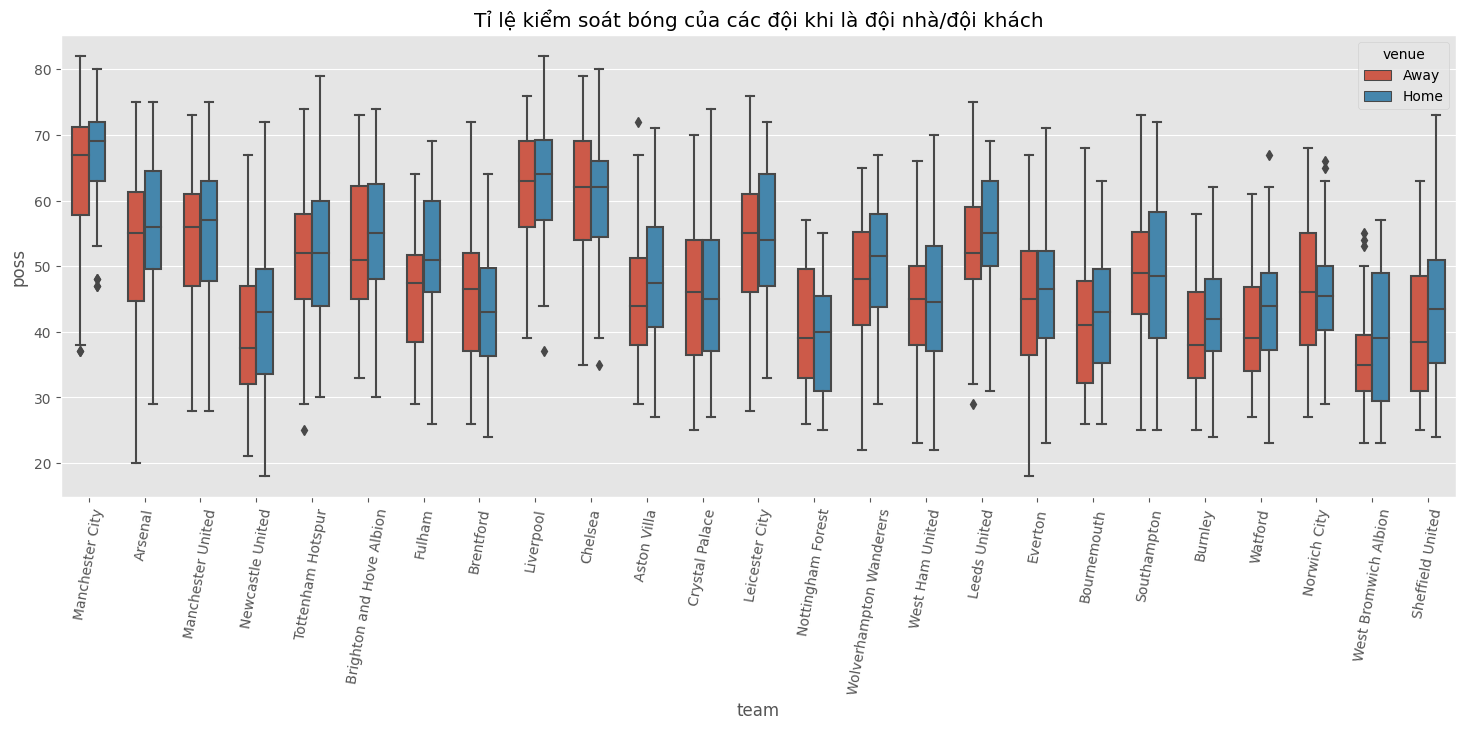

In [38]:
plt.subplots(figsize=(18,6))
sns.boxplot(data=df_ctrl, x="team", y="poss", hue='venue', width=0.6)
plt.title("Tỉ lệ kiểm soát bóng của các đội khi là đội nhà/đội khách")
plt.xticks(rotation=80)
plt.show()

### Phân tích kết quả từ biểu đồ
* Với đa số, đội nhà giữ tỉ lệ kiểm soát bóng tốt hơn so với đội khách, một số đội ngược lại là: `Brentford`, `Crystal Palace`, `West Ham United`, `Southampton`, `Norwich City`.
* Ta lấy mốc 50% làm chuẩn, các đội có tỉ lệ kiểm soát trung bình trên 50% được cho là các đội làm chủ trận đấu nhiều hơn. Các đội đó là: `Manchester City`, `Arsenal`, `Manchester United`, `Tottenham Hotspur`, `Brighton and Hove Albion`, `Liverpool`, `Chelsea`, `Leicester City`, `Leeds United`.
* Đặc biệt các đội có phần box nắm hoàn toàn trên mức 50% là: `Manchester City`, `Liverpool` và `Chelsea`.

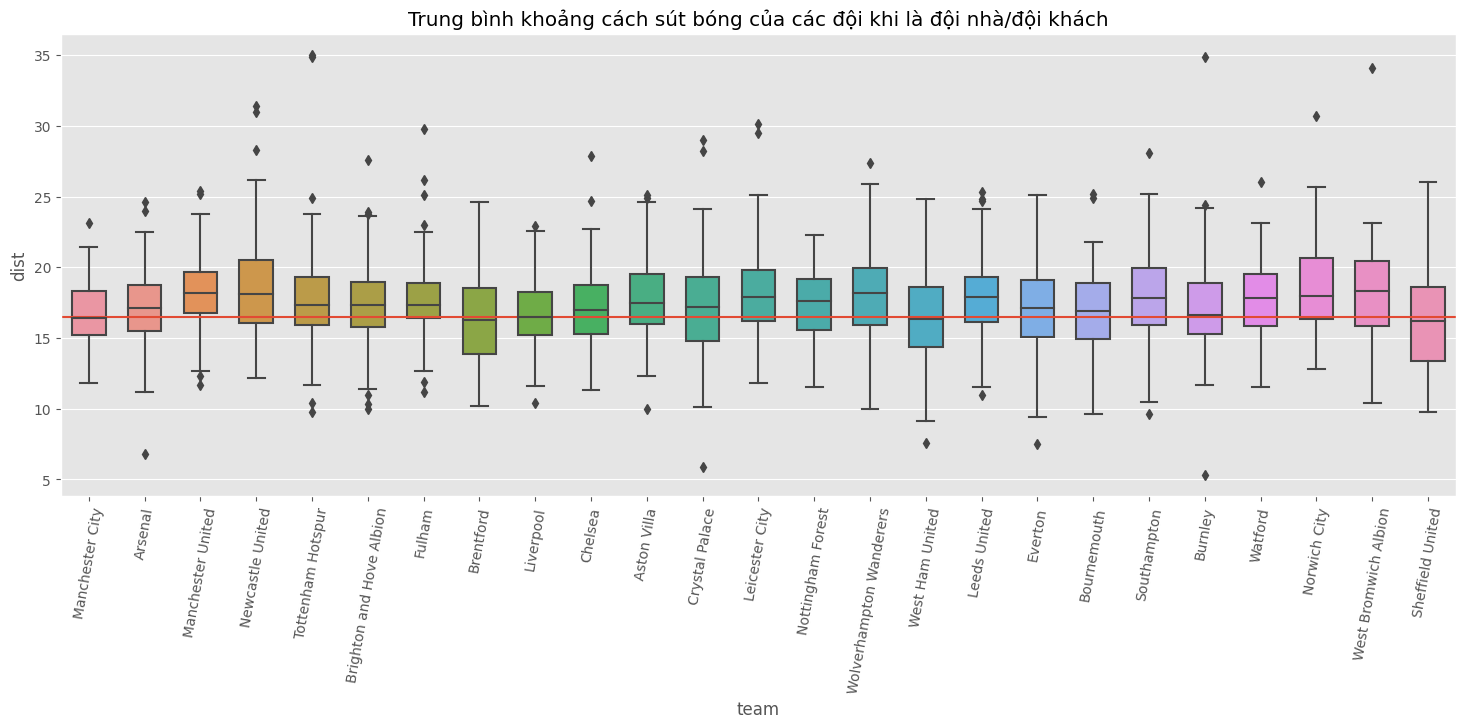

In [39]:
plt.subplots(figsize=(18,6))
plt.xticks(rotation=80)
ax = sns.boxplot(data=df_ctrl, x="team", y="dist", width=0.6)
ax.axhline(16.5)
plt.title("Trung bình khoảng cách sút bóng của các đội khi là đội nhà/đội khách")
plt.show()

### Phân tích kết quả từ biểu đồ
* Khoảng cách của các lượt sút thường tập trung trong đoạn 15-20m.
* Với đường line màu đỏ là khoảng cách 16,5m, bằng với khu vực vòng cấm địa của khung thành. Nếu cho rằng ngoài vòng 16,5m được xem là sút xa.
* Các đội có thể được coi là khả năng sút xa và lối chơi sút xa chính là: `Manchaster United`, `Newcastle United`, `Fulham`, `Leicester City`, `Norwich City`

## **2. Thời gian diễn ra trận đấu**

Các trận đấu thường được diễn ra vào ngày nào và vào khung giờ như thế nào?

### Các trường dữ liệu tương tác
- time
- day
### Xử lý dữ liệu
* Gom nhóm các khung giờ và các ngày lại và đếm số lượng
* Tổng số trận = tổng số rows/2 (Vì sẽ bị lặp lại khi thống kê 2 đội tuyển đối đầu)

In [40]:
total_hour = df[['time','day']].value_counts().sort_index()
total_hour = total_hour.fillna(0).reset_index(name='density')
total_hour['density'] = total_hour['density'].apply(lambda x: x/2)
df_order = total_hour.copy()
order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df_order['day'] = pd.Categorical(df_order['day'], order)
df_order.sort_values(by=['day'], inplace=True)
total_hour

,time,day,density
0,12:00,Sun,30.0
1,12:30,Mon,1.0
2,12:30,Sat,107.0
3,12:30,Thu,1.0
4,12:30,Wed,2.0
5,13:30,Sun,1.0
6,14:00,Sun,152.0
7,14:05,Sun,5.0
8,14:15,Sun,11.0
9,15:00,Mon,5.0


Text(0, 0.5, 'Time')

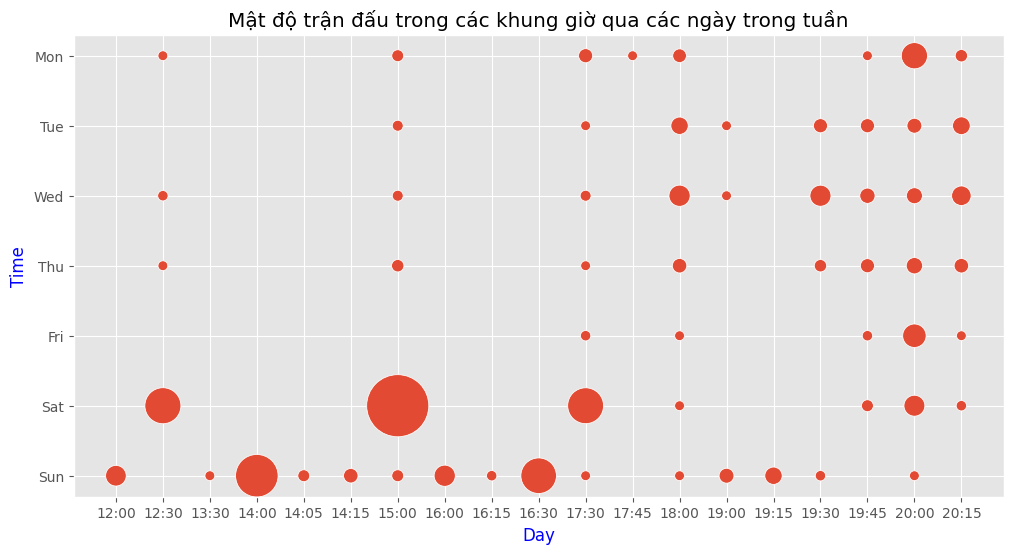

In [41]:
plt.subplots(figsize=(12,6))
sns.scatterplot(data=total_hour, x='time', y=df_order.day, size='density', legend=False, sizes=(50, 2000))
plt.title('Mật độ trận đấu trong các khung giờ qua các ngày trong tuần')
plt.xlabel('Day',color="blue")
plt.ylabel('Time',color="blue")

### Giải thích biểu đồ
Biểu đồ gồm 2 trục thời gian và ngày. Điểm giao nhau giữa các giá trị là thời gian bắt đầu một trận đấu. Số lượng trận đấu càng nhiều thì chấm đỏ càng lớn.
### Lý do chọn biểu đồ ***Scatter plot with marker size chart***
Biểu đồ phân tán có kích cỡ rất hữu ích cho việc thể hiện mật độ. Dựa vào biểu đồ, ta dễ dàng quan sát để biết mật độ và sự phân bố của thời gian bắt đầu các trận đấu.
### Phân tích kết quả từ biểu đồ
* Các trận đấu thường được diễn ra vào cuối tuần (Thứ bảy và Chủ Nhật) hoặc vào buổi tối (Sau 18h), có thể là do cuối tuần và buổi tối là thời gian nghỉ, mọi người có nhu cầu giải trí và có nhiều thời gian rảnh, vì thế Ban tổ chức giải đấu lựa chọn vì bóng đá cần phải bỏ thời gian dài để tham gia cổ vũ.
* Khung giờ cao điểm diễn ra các trận đấu là vào 15h ngày Thứ Bảy hàng tuần. Và tất cả trận đấu không tổ chức vào buổi sáng.

<p style="font-size:34px; color:#1f7cca; font-weight:bold; font-family:Barlow;">
Đặt vấn đề 4: Trực quan sự thay đổi trong xếp hạng của các mùa 2020, 2021, 2022 <br>

Trong mục này, ta sẽ vẽ biểu đồ đường, với mỗi đường ứng với 1 đội. Thứ tự của các đường được xếp từ hạng nhất đến hạng 20 từ trên xuống.
Với cách tính điểm và tính thứ hạng như sau: 
* 1 trận thắng (W) được tính là 3 điểm
* 1 trận hoà (D) được tính là 1 điểm
* Thua (L) không có điểm
* Nếu 2 đội bằng điểm nhau sẽ tính đến hiệu số bàn thắng/bàn thua. Nếu vẫn tiếp tục bằng điểm sẽ tính theo số bàn thắng ghi được. Vẫn bằng điểm thì ta sẽ lấy theo thứ tự bảng chữ cái.

### Các trường dữ liệu tương tác
- team
- result
- gf
- ga
- round
### Xử lý dữ liệu
* Nếu result = W sẽ tính là 3 điểm cho row đó, D tính là 1 và L là 0
* Sau đó sẽ cộng dồn điểm qua các round đấu và xếp hạng qua column "rank" bằng cách cumcount từ trên xuống

In [42]:
def Result(string):
    if string=='W':
        return 3
    elif string=='D':
        return 1
    else:
        return 0

In [43]:
df_2020 = df[df['season'] == 2020][['round','result','gf','ga','team']]
df_2021 = df[df['season'] == 2021][['round','result','gf','ga','team']]
df_2022 = df[df['season'] == 2022][['round','result','gf','ga','team']]
df_2020 = df_2020.reset_index().drop(['index'],axis=1).sort_values(['team', 'round'], ascending=[True, True])
df_2021 = df_2021.reset_index().drop(['index'],axis=1).sort_values(['team', 'round'], ascending=[True, True])
df_2022 = df_2022.reset_index().drop(['index'],axis=1).sort_values(['team', 'round'], ascending=[True, True])
df_2020


,round,result,gf,ga,team
266,1,W,1.0,0.0,Arsenal
267,2,W,2.0,1.0,Arsenal
268,3,L,1.0,3.0,Arsenal
269,4,D,2.0,2.0,Arsenal
270,5,D,2.0,2.0,Arsenal
...,...,...,...,...,...
261,34,L,0.0,1.0,Wolverhampton Wanderers
262,35,W,3.0,0.0,Wolverhampton Wanderers
263,36,D,1.0,1.0,Wolverhampton Wanderers
264,37,W,2.0,0.0,Wolverhampton Wanderers


In [44]:
def sum_pts(df):
    df['pts'] = df['result'].apply(Result)
    df['gd'] = df['gf'] - df['ga']
    gd = 0
    team = ''
    point = 0
    for i, row in df.iterrows():
        point = point + row['pts']
        gd = gd + row['gd']
        if row['team'] != team:
            team = row['team']
            point = row['pts']
            gd = row['gd']
        else:
            df.at[i,'pts'] = point
            df.at[i,'gd'] = gd
    # df.groupby(['rank'] = df['pts'].rank(method='max')
    df["rank"] = df.sort_values(by=['pts', 'gd','gf']).groupby('round').cumcount(ascending=False) + 1

In [45]:
sum_pts(df_2020)
sum_pts(df_2021)
sum_pts(df_2022)

In [46]:
df_2020

,round,result,gf,ga,team,pts,gd,rank
266,1,W,1.0,0.0,Arsenal,3,1.0,7
267,2,W,2.0,1.0,Arsenal,6,2.0,2
268,3,L,1.0,3.0,Arsenal,6,0.0,3
269,4,D,2.0,2.0,Arsenal,7,0.0,6
270,5,D,2.0,2.0,Arsenal,8,0.0,7
...,...,...,...,...,...,...,...,...
261,34,L,0.0,1.0,Wolverhampton Wanderers,52,8.0,6
262,35,W,3.0,0.0,Wolverhampton Wanderers,55,11.0,6
263,36,D,1.0,1.0,Wolverhampton Wanderers,56,11.0,6
264,37,W,2.0,0.0,Wolverhampton Wanderers,59,13.0,6


In [47]:
def ranking_plot(df):
    ax = px.line(df,x='round',y='rank',color='team',symbol="team")
    ax.update_layout(
        width=1500,
        height=600
        
    )
    ax.update_yaxes(autorange="reversed", dtick=1)
    ax.update_xaxes(dtick=1)
    ax.show()

In [48]:
ranking_plot(df_2020)

### Phân tích kết quả từ biểu đồ
* Trong mua giải 2019-2020 gần như Liverpool chiếm độc tôn vị trí đầu bảng từ đầu giải đến cuối giải, cho thấy sự vượt trội và out trình của đội bóng này trong mùa giải đó
* Các vị trí còn lại bị ganh đua rất quyết liệt cho đến khi kết thúc mùa giải. ta có thể thấy sự vươn lên ngoạn mục của Manchester United vào vị trí top 3 trong những vòng cuối cùng và sự đánh mất phong độ của Leicester City khi tụt xuống top 5.
* Aston Villa đã giành được xuất trụ hạng gay cấn ở vòng đấu thứ 37

In [49]:
ranking_plot(df_2021)

### Phân tích kết quả từ biểu đồ
* Trong mua giải 2020-2021 đặc biệt khi 3 đội cuối bảng xếp hạng rất giữ vững phong độ khi chỉ thấy một đường thẳng đi xuống giải hạng 2.
* Vị trí đầu bảng xếp hạng cạnh tranh rất quyết liệt cho tới vòng đấu thứ 19 (Nửa giải đấu) khi 2 đội bóng nhà Manchester cho thấy phong độ hoàn hảo của mình băng băng về đích ở vị trí top 1 và top 2.
* Liverpool đương kiêm vô địch cũng thể hiện sự nỗ lực vươn lên vị trí top 3 ở vòng cuối của giải đấu


In [50]:
ranking_plot(df_2022)

### Phân tích kết quả từ biểu đồ
* Trong mua giải 2021-2022 trái với mùa giải 2020-2021 khi 3 đội dẫn đầu bảng xếp hạng rất giữ vững phong độ khi chỉ thấy một đường thẳng đi tới top 3 từ vòng thứ 15.
* Ở mùa giải này ta có thể thấy BigSix đã khẳng định được bản thân mình khi chiếm 6 ngôi đầu bảng.
* Manchester City đang thể hiện phong độ tuyệt với cùng với những ngôi sao vụt sáng, giữ vững cho mình chức vô địch 2 lần liên tiếp từ giữa mùa giải.
* Cuộc tranh vé trụ hạng của 3 đội `Everton`, `Leeds United` và `Burnley` nhưng chia buồn cùng `Burnley`.


Qua 3 biểu đồ trên ta có thể thấy được khoảng 15 round đầu của giải đấu cuộc chiến đua hạng rất quyết liệt và từ đó về sau có thể định ra được các vị trí then chốt trên bảng xếp hạng. Về cuối giải đấu, các đội lại càng thi đấu quyết liệt hơn để tranh những suất quan trọng trong bảng xếp hạng.

<p style="font-size:34px; color:#1f7cca; font-weight:bold; font-family:Barlow;">
Đặt vấn đề 5: Tìm mối quan hệ giữa 2 chỉ số trong bảng dữ liệu <br>

## **1. Ta thử vẽ biểu đồ liên hệ giữa round đấu và số lượng bàn thắng xem có thấy gì không nhé!**

### Các trường dữ liệu tương tác
- gf
- round

In [51]:
total_goals_week = df.groupby(['round','team'])['gf'].sum().reset_index()

total_goals_week

,round,team,gf
0,1,Arsenal,6.0
1,1,Aston Villa,3.0
2,1,Bournemouth,3.0
3,1,Brentford,4.0
4,1,Brighton and Hove Albion,8.0
...,...,...,...
929,38,Tottenham Hotspur,10.0
930,38,Watford,3.0
931,38,West Bromwich Albion,1.0
932,38,West Ham United,5.0


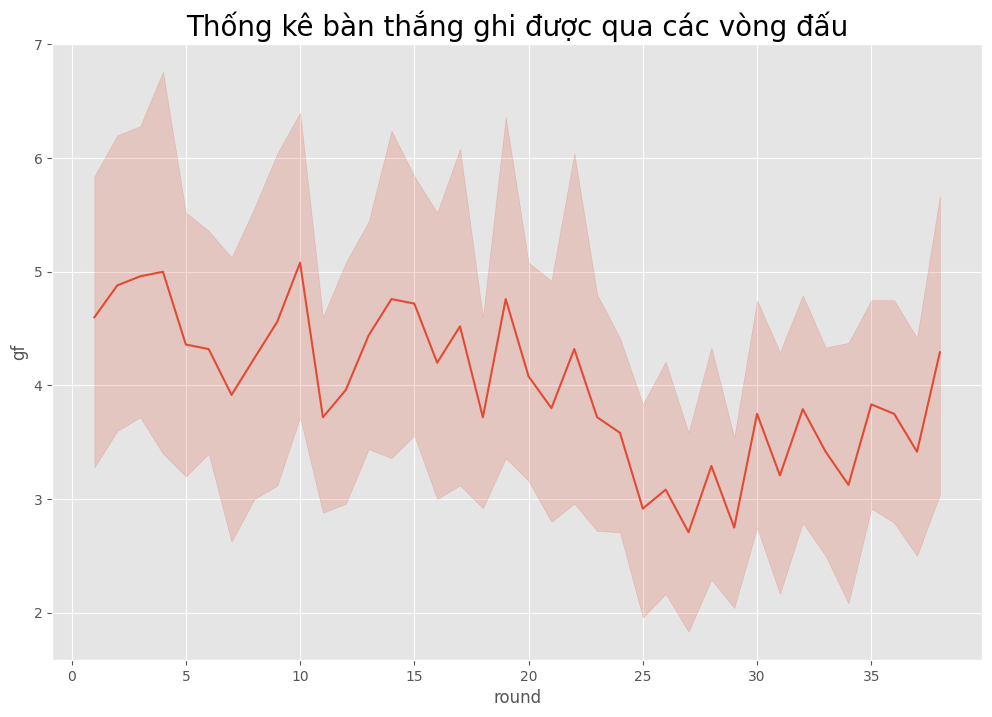

In [52]:
plt.figure(figsize = (12,8))
ax = sns.lineplot(data=total_goals_week,x='round',y='gf')
plt.title('Thống kê bàn thắng ghi được qua các vòng đấu', fontsize = 20)

plt.show()

### Phân tích kết quả từ biểu đồ
* Đúng như dự đoán, số bàn thắng sẽ giảm dần giảm dần và tăng lên khi vào cuối giải. Khoảng 15-20 round đầu của mùa giải, lượng bàn thắng ghi được rất nhiều và sẽ bắt đầu giảm khi các vị trí trong bảng xếp hạng đã có khoảng cách an toàn.
* Về cuối giải các đội bóng có xu hướng tấn công quyết liệt để ghi bàn và giành những số điểm quan trọng.


## **2. Có phải thắng càng nhiều thì lượng bàn thắng càng lớn hay không, có xảy ra trường hợp như Croatia ở WorldCup?**

In [53]:
total_goals = df.groupby(['team'])['gf'].sum().reset_index()
total_wins = df.groupby(['team'])['result'].value_counts().unstack().reset_index()
total_wins = total_wins.drop(['team','D','L'],axis=1)
df_1 = pd.concat([total_goals, total_wins],axis=1)
df_1

,team,gf,W
0,Arsenal,218.0,70
1,Aston Villa,174.0,46
2,Bournemouth,60.0,13
3,Brentford,84.0,21
4,Brighton and Hove Albion,160.0,40
5,Burnley,110.0,32
6,Chelsea,226.0,68
7,Crystal Palace,142.0,40
8,Everton,150.0,45
9,Fulham,61.0,15


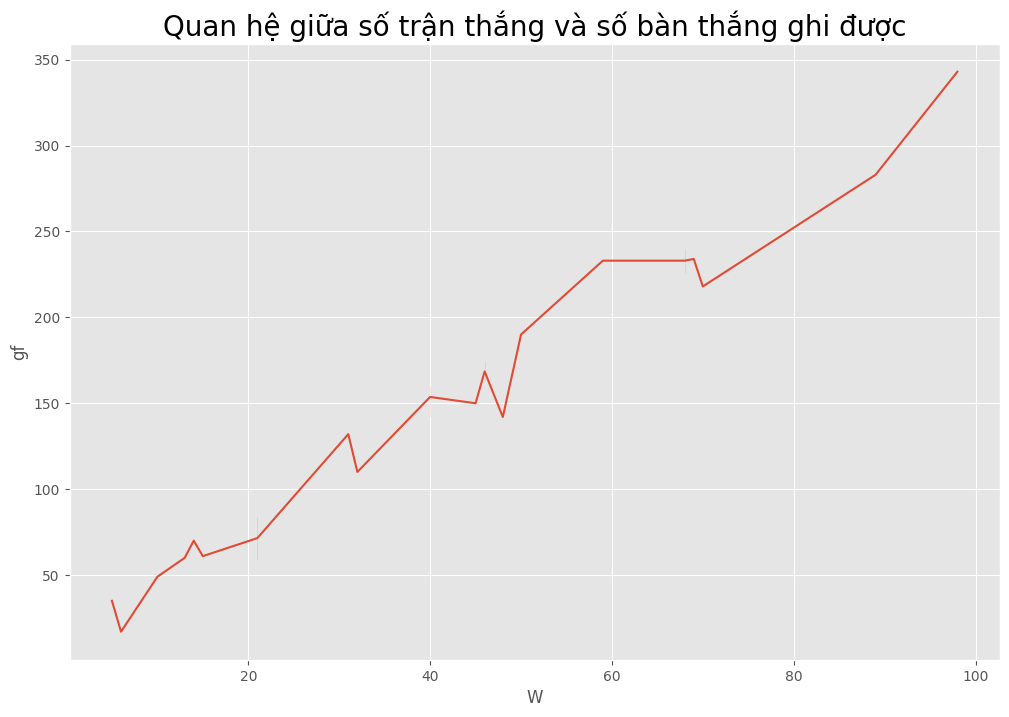

In [54]:
plt.figure(figsize = (12,8))


sns.lineplot(data=df_1, x="W", y="gf")
plt.title('Quan hệ giữa số trận thắng và số bàn thắng ghi được', fontsize = 20)

plt.show()

### Phân tích kết quả từ biểu đồ
* Ta có thể thấy để giành được chiến thắng thì ta phải ghi được nhiều bàn thắng hơn đối thủ, và chắc chắn rằng càng nhiều trận thắng thì số lượng bàn thắng càng tăng. Từ biểu đồ ta có thể hoạch định được số lượng bàn thắng của một đội sẽ tầm khoảng bao nhiêu khi có số trận thắng cho trước. Ví dụ khi có 20 trận thắng thì số lượng bàn thắng sẽ dao động trên dưới 60 bàn.


## **3. Liệu dự đoán từ chỉ số xG có đúng?**

Lý do chọn biểu đồ phân tán
- Biểu đồ implot (scatter plot with a fitted line) là một công cụ mạnh mẽ để hiển thị đồ thị tương quan giữa hai biến dữ liệu số. Nó kết hợp cả biểu đồ phân tán và đường hồi quy tuyến tính để trình bày tương quan giữa hai biến. 
- Sự phụ thuộc tuyến tính của một biến đối với biến đầu vào có thể được hiển thị bằng cách sử dụng đường hồi quy trên biểu đồ implot. Nếu đường hồi quy nghiêng lên, có nghĩa là sự phụ thuộc tuyến tính giữa hai biến tăng lên. Nếu nó nghiêng xuống, có nghĩa là sự phụ thuộc tuyến tính giảm. 

--> Vì vậy, biểu đồ implot được sử dụng để phân tích dữ liệu và trình bày kết quả phân tích dữ liệu cho người đọc một cách rõ ràng và dễ hiểu. Nó cũng là công cụ hữu ích để đưa ra dự đoán và giải thích tương quan giữa các biến số. 


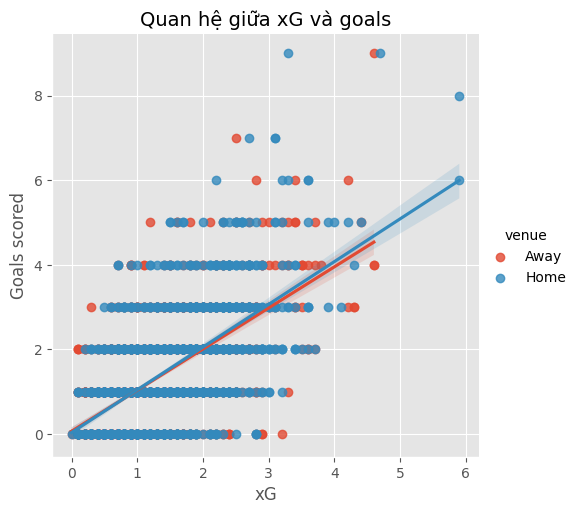

In [55]:
# Tạo biểu đồ scatterplot với đường trendline và phân biệt dữ liệu theo venue
sns.lmplot(x='xg', y='gf', hue='venue', data=df)

# Đặt tên cho trục x và y
plt.xlabel('xG')
plt.ylabel('Goals scored')
# Thêm tiêu đề cho biểu đồ
plt.title('Quan hệ giữa xG và goals', fontsize=14)

# Hiển thị biểu đồ
plt.show()

- Trường dữ liệu trực quan: xG, goals 

- Giải thích biểu đồ: Trục x biểu diện số bàn thắng được dự đoán trong một trận (từ năm 2019-2023 (vẫn còn đang cập nhật)), trục y biểu diễn cho số bàn thắng thực tế của trận đấu đó. Chấm màu xanh là đội khách và chấm màu cam là đội nhà. 

- Nhận xét biểu đồ: Biểu đồ implot giữa xG và goals có thể cho thấy sự tương quan tích cực giữa hai biến, tức là khi giá trị xG tăng thì số bàn thắng cũng tăng. Đường trendline trong biểu đồ này có hướng tăng dần, cho thấy mối quan hệ giữa xG và số bàn thắng có xu hướng tăng cường. Tuy nhiên, độ dốc của đường trendline không phải là 1, tức là tỉ lệ giữa giá trị xG và số bàn thắng không luôn là 1:1. Điều này có thể do nhiều yếu tố khác nhau ảnh hưởng đến khả năng ghi bàn của các cầu thủ như chất lượng đối thủ, đội hình, điều kiện thi đấu, v.v. Biểu đồ cũng cho thấy phân bố chung của dữ liệu khá rải rác trên trục x và trục y, cho thấy sự đa dạng của dữ liệu và không có quá nhiều giá trị ngoại lệ. 

## **4. Hiệu suất ghi bàn có liên quan đến tỉ lệ kiểm soát bóng hay không?**

Ta có thể đặt ra giả thuyết rằng: Kiểm soát bóng càng nhiều thì càng có nhiều cơ hội để ghi bàn. Nhưng cũng có nhiều đội bóng đá kiểm soát mà không tấn công ồ ạt, cũng có các đội bóng chơi lối phòng thủ - phản công thì tỉ lệ kiểm soát ít nhưng lại có lượt sút bóng cao.

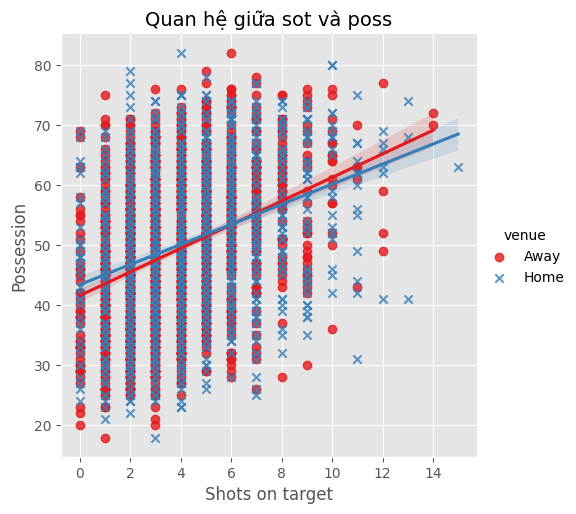

In [56]:
# Vẽ biểu đồ implot
sns.lmplot(x='sot', y='poss', data=df, hue='venue', markers=['o', 'x'], palette='Set1')

# Đặt tên cho trục x và y
plt.xlabel('Shots on target')
plt.ylabel('Possession')
plt.title('Quan hệ giữa sot và poss', fontsize=14)

# Hiển thị biểu đồ
plt.show()

- Trường dữ liệu trực quan: sot, poss 

- Giải thích biểu đồ: Trục x biểu diện số lượt sút trúng mục tiêu (từ năm 2019-2023 (vẫn còn đang cập nhật)), trục y biểu diễn phần trăm kiểm soát bónǵ. Chấm màu đỏ là đội khách và dấu x là đội nhà. 

- Nhận xét biểu đồ: Biểu đồ implot giữa sot (shots on target) và poss (possession) cho thấy một mối tương quan dương mạnh giữa hai biến này. Cụ thể là khi possession càng cao thì số lượng shots on target cũng càng tăng. Tuy nhiên, cũng có một số điểm dữ liệu ngoại lệ (outlier) khi possession thấp nhưng số lượng shots on target lại cao và ngược lại. Do đó, để đánh giá chính xác hơn về mối tương quan giữa hai biến này, có thể cần phải xem xét thêm các yếu tố khác như chất lượng đội bóng, chiến thuật thi đấu, vị trí sân... 

## **5. So sánh 2 đội bóng qua thống số**

In [57]:
def findSkewnessBasedOnPearson(mean,median, standard_deviation):
    skewness = 3*(mean-median)/standard_deviation
    return skewness

def chooseMeanOrMedian(skewness):
    if math.fabs(skewness) < 0.5:
        return 'mean'
    return 'median'

In [58]:
def preprocessing_data(df):
    list_of_teams = ['Manchester City','Liverpool']
    list_of_attributes = ['gf','ga','xg','xga','poss','sh','sot','dist','fk']
    df = df.loc[:, ['gf','ga','xg','xga','poss','sh','sot','dist','fk','team']]
    df_norm = df[list_of_attributes]
    df_norm = (df_norm - df_norm.min())/(df_norm.max()-df_norm.min())

    df[list_of_attributes] = df_norm

    data = {team: {attribute: -1 for attribute in list_of_attributes} for team in list_of_teams}
    for attribute in list_of_attributes:
        value_group_by_team = df.groupby('team')[attribute].apply(list)
        mean_s = value_group_by_team.apply(lambda x: np.nanmean(x))
        median_s = value_group_by_team.apply(lambda x: np.nanmedian(x))
        std_s = value_group_by_team.apply(lambda x: np.nanstd(x))
        value = {team: 0 for team in list_of_teams}
        for team in list_of_teams:
            skewness = findSkewnessBasedOnPearson(mean_s[team],median_s[team], std_s[team])
            option = chooseMeanOrMedian(skewness)
            if option == 'mean':
                value[team] = mean_s[team]
            else:
                value[team] = median_s[team]
        if len(set(value.values())) > 1:
            for team in list_of_teams:
                data[team][attribute] = value[team]
        else:
            for team in list_of_teams:
                del data[team][attribute]
    
    return data

In [59]:
data = preprocessing_data(df)

[0.22222222 0.09407948 0.36731412 0.11864407 0.78125    0.56510478
 0.40194647 0.37373737 0.22222222]
[0.23292181 0.10617284 0.30508475 0.18066541 0.68912037 0.54002389
 0.38716049 0.38558424 0.23292181]


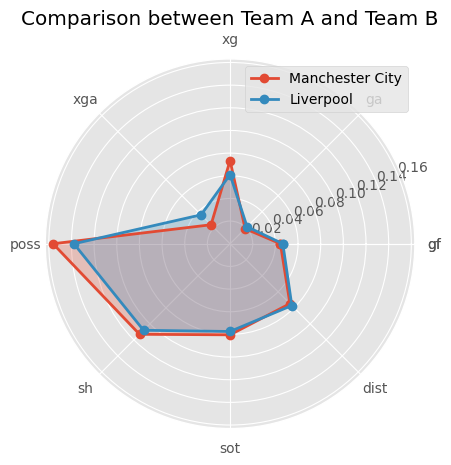

In [60]:
# Tên các thuộc tính
attributes = list(data['Manchester City'].keys())
attributes.append('gf')

# Tạo các trục xác định vị trí của các đường trên biểu đồ radar
angles = np.linspace(0, 2*np.pi, len(attributes)-1, endpoint=False)
angles = np.concatenate((angles, [angles[0]]))

# Vẽ biểu đồ radar cho mỗi đội
for team in data:
    values = list(data[team].values())
    values = np.concatenate((values, [values[0]]))
    # Tính toán khoảng cách và góc tương ứng trên biểu đồ radar
    distances = np.array(values) / 5
    angles_in_radians = np.array(angles)
    print(values)
    # Vẽ đường nối các điểm trên biểu đồ radar
    ax = plt.subplot(111, polar=True)
    ax.plot(angles_in_radians, distances, 'o-', linewidth=2, label=team)
    ax.fill(angles_in_radians, distances, alpha=0.25)
    ax.set_thetagrids(angles * 180/np.pi, attributes)
    ax.set_title("Comparison between Team A and Team B")
    ax.grid(True)

# Hiển thị biểu đồ radar
plt.legend(loc="best")
plt.show()

### Ta so sánh 2 đội bóng được coi là mạnh nhất thông qua dữ liệu

Trong đó có thể thấy Man City vẫn trội hơn về tỉ lệ kiểm soát bóng và hiệu quả tấn công.

Còn Liverpool hơn Man City về số lượt sút và sút xa.

<p style="font-size:34px; color:#1f7cca; font-weight:bold; font-family:Barlow;">
Đặt vấn đề 6: Mô hình logistic dự đoán kết quả thông qua tỉ lệ kiểm soát bóng <br>

Mô hình: 

- Logistics Regression.

Trích chọn đặc trưng: 

- Marker cho Module này là cột result, với W được tính là 1, còn lại là 0. Có nghĩa là dữ đoán rằng liệu tỉ lệ kiểm soát bóng cao thì có mang đến chiến thắng nhiều hay không?

Tiền xử lý dữ liệu:

- Loại bỏ các mẫu có giá trị thuộc tính không xác định.  

Tập train, test
- Train: Các trận đấu của mùa giải 2020, 2021, 2022.
- Test: Các trận đấu của mùa giải 2023.

In [61]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression


In [62]:
# df["team_code"] = df["team"].astype("category").cat.codes
# changeTeamName={'Brighton':'Brighton and Hove Albion',
#                 'Manchester Utd':'Manchester United',
#                 'Newcastle Utd':'Newcastle United',
#                 'Sheffield Utd' : 'Sheffield United',
#                 'Tottenham' : 'Tottenham Hotspur',
#                 'West Brom' : 'West Bromwich Albion',
#                 'West Ham' : 'West Ham United',
#                 'Wolves' : 'Wolverhampton Wanderers'}
# df['opponent']=df['opponent'].replace(changeTeamName)
# df["opp_code"] = df["opponent"].astype("category").cat.codes
# df['result'] = df['result'].apply(lambda x: 1 if (x == 'W') else 0)
# df['temp'] = df['team_code'].apply(str) + '0' + df['opp_code'].apply(str)
# df = df.loc[:, ['season', 'result','team_code']]
df_tr = df.loc[:, ['poss','result','season']]
df_tr['result'] = df_tr['result'].apply(lambda x: 1 if (x == 'W') else 0)
df_tr = df_tr.dropna()

# #df.loc[df['result'] != 'W', 'result'] = 'N'
#X_train, X_test, y_train, y_test = train_test_split(df[['gf', 'ga', 'poss', 'attendance', 'dist', 'fk', 'pkatt']], df['result'], test_size=0.2, random_state=42)
# Chọn các mẫu trong tập huấn luyện có giá trị năm là 2020, 2021, 2022
train = df_tr[df_tr['season'].isin([2020, 2021, 2022])]

# Chọn các mẫu trong tập kiểm tra có giá trị năm là 2023
test = df_tr[df_tr['season'] == 2023]

# Tách các mẫu huấn luyện thành đầu vào X và nhãn y
X_train = train.drop(['season','result'], axis=1)
y_train = train['result']

# Tách các mẫu kiểm tra thành đầu vào X và nhãn y
X_test = test.drop(['season','result'], axis=1)
y_test = test['result']

# Sử dụng mô hình hồi quy logistic
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
df


,date,time,round,day,venue,result,gf,ga,opponent,xg,...,formation,referee,sh,sot,dist,fk,pk,pkatt,season,team
1,2022-08-07,16:30,1,Sun,Away,W,2.0,0.0,West Ham,2.2,...,4-3-3,Michael Oliver,13.0,1.0,18.7,1.0,1.0,1.0,2023,Manchester City
2,2022-08-13,15:00,2,Sat,Home,W,4.0,0.0,Bournemouth,1.7,...,4-2-3-1,David Coote,19.0,7.0,17.5,0.0,0.0,0.0,2023,Manchester City
3,2022-08-21,16:30,3,Sun,Away,D,3.0,3.0,Newcastle Utd,2.1,...,4-3-3,Jarred Gillett,21.0,10.0,16.2,1.0,0.0,0.0,2023,Manchester City
4,2022-08-27,15:00,4,Sat,Home,W,4.0,2.0,Crystal Palace,2.2,...,4-2-3-1,Darren England,18.0,5.0,14.1,0.0,0.0,0.0,2023,Manchester City
5,2022-08-31,19:30,5,Wed,Home,W,6.0,0.0,Nott'ham Forest,3.3,...,4-2-3-1,Paul Tierney,17.0,9.0,14.8,0.0,0.0,0.0,2023,Manchester City
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,2020-07-07,18:00,34,Tue,Away,L,1.0,2.0,Watford,1.2,...,4-2-3-1,Anthony Taylor,12.0,3.0,16.9,1.0,0.0,0.0,2020,Norwich City
39,2020-07-11,12:30,35,Sat,Home,L,0.0,4.0,West Ham,0.6,...,4-2-3-1,Kevin Friend,11.0,2.0,19.8,1.0,0.0,0.0,2020,Norwich City
40,2020-07-14,20:15,36,Tue,Away,L,0.0,1.0,Chelsea,0.1,...,4-1-4-1,Jonathan Moss,2.0,0.0,20.6,0.0,0.0,0.0,2020,Norwich City
41,2020-07-18,17:30,37,Sat,Home,L,0.0,2.0,Burnley,0.3,...,4-2-3-1,Kevin Friend,6.0,2.0,13.4,0.0,0.0,0.0,2020,Norwich City


In [63]:
# Đánh giá mô hình
acc = accuracy_score(y_test, y_pred)
print('Accuracy score: ', acc)

cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix: \n', cm)

cr = classification_report(y_test, y_pred)
print('Classification report: \n', cr)

Accuracy score:  0.6122448979591837
Confusion matrix: 
 [[266   8]
 [163   4]]
Classification report: 
               precision    recall  f1-score   support

           0       0.62      0.97      0.76       274
           1       0.33      0.02      0.04       167

    accuracy                           0.61       441
   macro avg       0.48      0.50      0.40       441
weighted avg       0.51      0.61      0.49       441



<AxesSubplot: xlabel='poss', ylabel='result'>

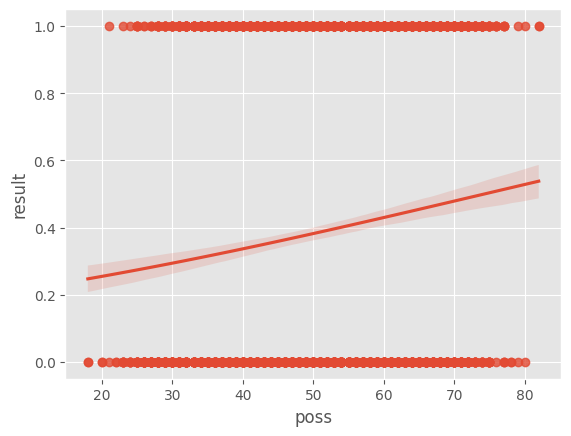

In [64]:
df_lr = df.loc[:, ['poss','result']]
df_lr['result'] = df_lr['result'].apply(lambda x: 1 if (x == 'W') else 0)
sns.regplot(x='poss', y='result', data=df_lr, logistic=True)

Với tỉ lệ chính xác của mô hình vào khoảng 61%, mô hình được coi là phù hợp.

Theo kết quả của biểu đồ vẽ trên mô hình, ta thấy tỉ lệ kiểm soát bóng càng cao thì tỉ lệ chiến thắng càng tăng.

Có thể là vì kiểm soát bóng nhiều chính là kiểm soát được trận đấu và thể hiện sự áp đảo của đội bóng.

### **Thử vẽ cây quyết định để dự đoán thắng thua của 2 đội bóng**

In [70]:
from sklearn import tree

In [71]:
df = pd.read_csv("../datasets/matches.csv", index_col=0) 
changeTeamName={'Brighton':'Brighton and Hove Albion',
                'Manchester Utd':'Manchester United',
                'Newcastle Utd':'Newcastle United',
                'Sheffield Utd' : 'Sheffield United',
                'Tottenham' : 'Tottenham Hotspur',
                'West Brom' : 'West Bromwich Albion',
                'West Ham' : 'West Ham United',
                'Wolves' : 'Wolverhampton Wanderers'}
df['opponent']=df['opponent'].replace(changeTeamName)
df["opp_code"] = df["opponent"].astype("category").cat.codes
df["team_code"] = df["team"].astype("category").cat.codes
df['result'] = df['result'].apply(lambda x: 1 if (x == 'W') else 0)
df['round'] = df['round'].str.extract('(\d+)', expand=False).astype(int)
df = df.loc[:, ['season','result', 'opp_code', 'team_code','round']]
df = df.dropna()

# #df.loc[df['result'] != 'W', 'result'] = 'N'
#X_train, X_test, y_train, y_test = train_test_split(df[['gf', 'ga', 'poss', 'attendance', 'dist', 'fk', 'pkatt']], df['result'], test_size=0.2, random_state=42)
# Chọn các mẫu trong tập huấn luyện có giá trị năm là 2020, 2021, 2022
train = df[df['season'].isin([2020, 2021, 2022])]

# Chọn các mẫu trong tập kiểm tra có giá trị năm là 2023
test = df[df['season'] == 2023]

# Tách các mẫu huấn luyện thành đầu vào X và nhãn y
X_train = train.drop(['season','result'], axis=1)
y_train = train['result']

# Tách các mẫu kiểm tra thành đầu vào X và nhãn y
X_test = test.drop(['season','result'], axis=1)
y_test = test['result']

# Sử dụng mô hình hồi quy logistic
tr = tree.DecisionTreeClassifier()
tr.fit(X_train, y_train)



DecisionTreeClassifier()

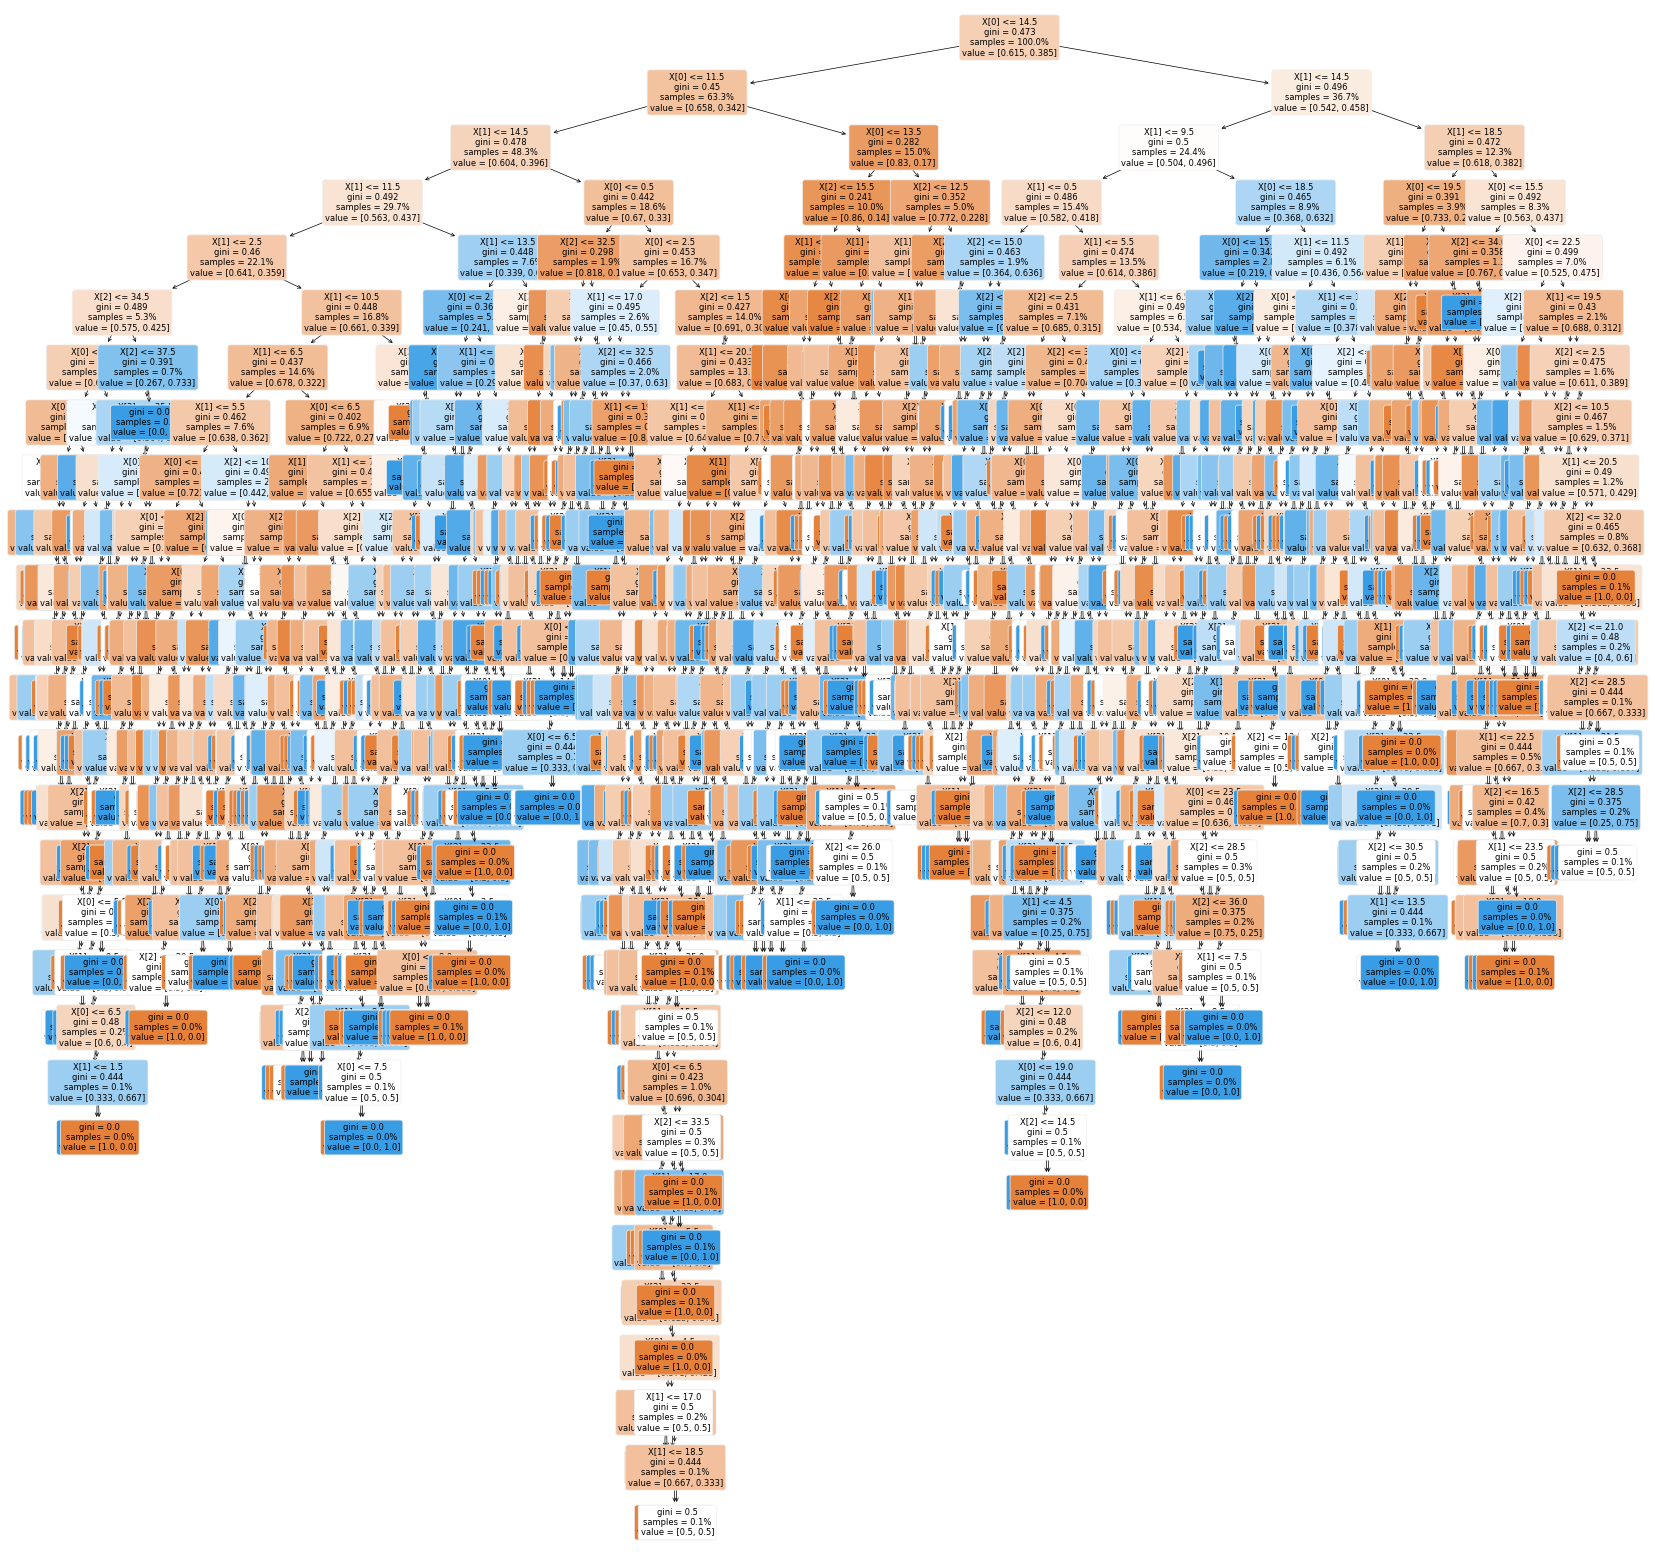

In [ ]:
# plt.figure(figsize=(20, 20))
# tree.plot_tree(tr,
#           rounded=True, # Rounded node edges
#           filled=True, # Adds color accoding to class
#           proportion=True,
#           fontsize=6);

### Quá nhiều trường hợp nên ta ko nói đến biểu đồ!!!

In [72]:
y_pred = tr.predict(X_test)

In [73]:
# Đánh giá mô hình
acc = accuracy_score(y_test, y_pred)
print('Accuracy score: ', acc)

cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix: \n', cm)

cr = classification_report(y_test, y_pred)
print('Classification report: \n', cr)

Accuracy score:  0.6077097505668935
Confusion matrix: 
 [[186  88]
 [ 85  82]]
Classification report: 
               precision    recall  f1-score   support

           0       0.69      0.68      0.68       274
           1       0.48      0.49      0.49       167

    accuracy                           0.61       441
   macro avg       0.58      0.58      0.58       441
weighted avg       0.61      0.61      0.61       441



Mô hình với độ chính xác 60% được coi là phù hợp